# EDA For Ball to Ball Data

The file './data/ball_to_ball/deliveries.csv' contains ball to ball data for all the matches. This notebook will be used to explore the data and understand the data better.

## Importing Libraries And Data

In [2]:
#System imports
import os
import sys
import json


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [37]:
# Loading Configurations
# ----------------------
with open('config.json') as f:
    config_data = json.load(f)

# Getting data path
ball_data_path = config_data["data"]["ball_to_ball"]
match_data_path = config_data["data"]["match_data"]

# Getting the data
# ----------------
ball_data = pd.read_csv(ball_data_path)
match_data = pd.read_csv(match_data_path)


### Extracting Matches by Season

In this step, we are using the `match_data` DataFrame to group matches by season. We extract the match IDs for each season and store them in a dictionary where the keys are the season identifiers and the values are lists of match IDs. This dictionary, named `year_match_dict`, allows us to easily retrieve matches corresponding to a particular season for further analysis.



In [44]:
# Create a dictionary mapping each season to its list of match ids
year_match_dict = {
    season: match_data[match_data['season'] == season]['id'].tolist()
    for season in match_data['season'].unique()
}
for season, match_ids in year_match_dict.items():
     print(season, len(match_ids))

# Divide ball_data by season based on the match_ids from match_data
ball_data_by_season = {
    season: ball_data[ball_data['match_id'].isin(match_ids)]
    for season, match_ids in year_match_dict.items()
}

# Optionally, print the keys to verify the seasons
print(list(ball_data_by_season.keys()))


2007/08 58
2009 57
2009/10 60
2011 73
2012 74
2013 76
2014 60
2015 59
2016 60
2017 59
2018 60
2019 60
2020/21 60
2021 60
2022 74
2023 74
2024 71
['2007/08', '2009', '2009/10', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020/21', '2021', '2022', '2023', '2024']


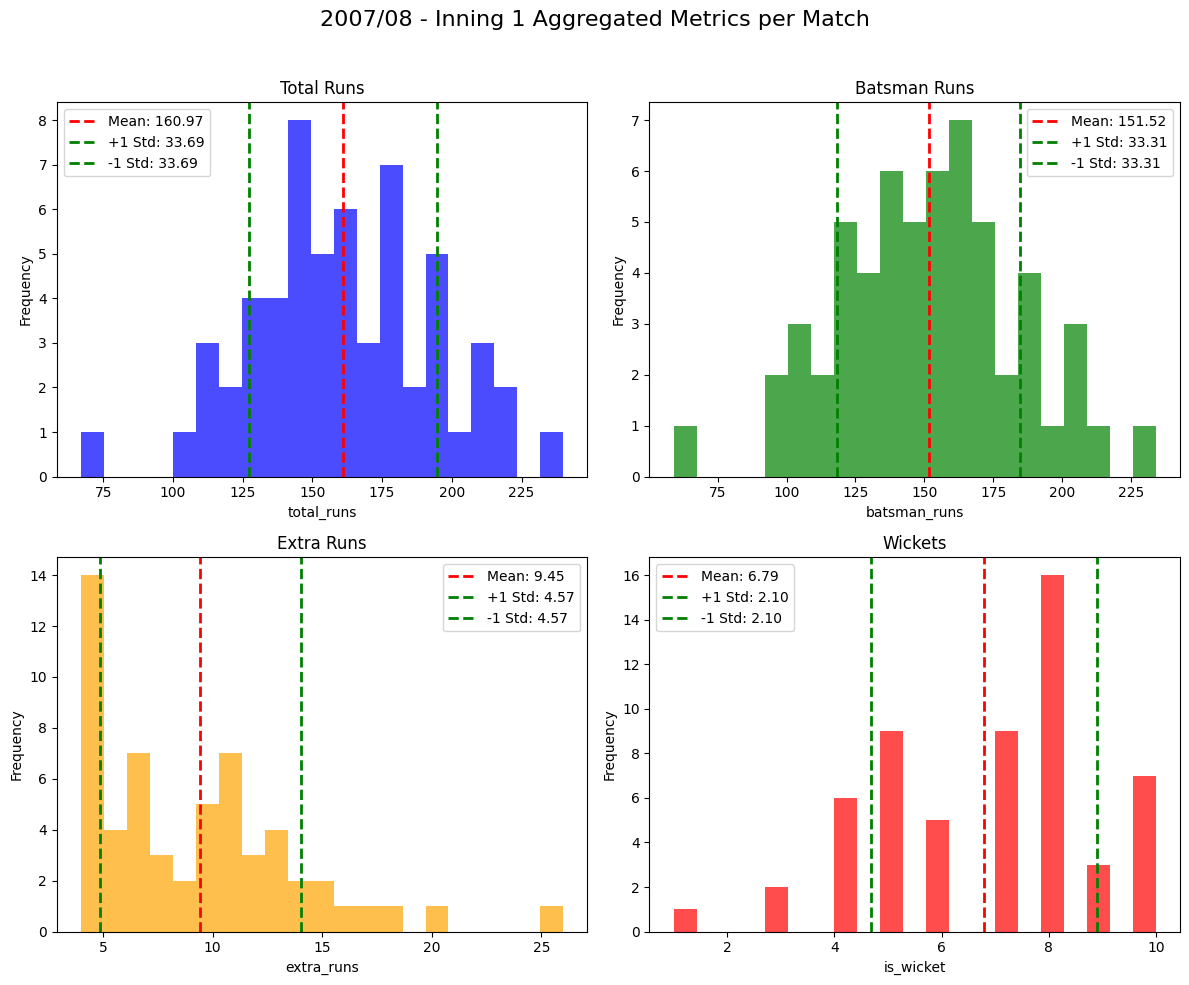

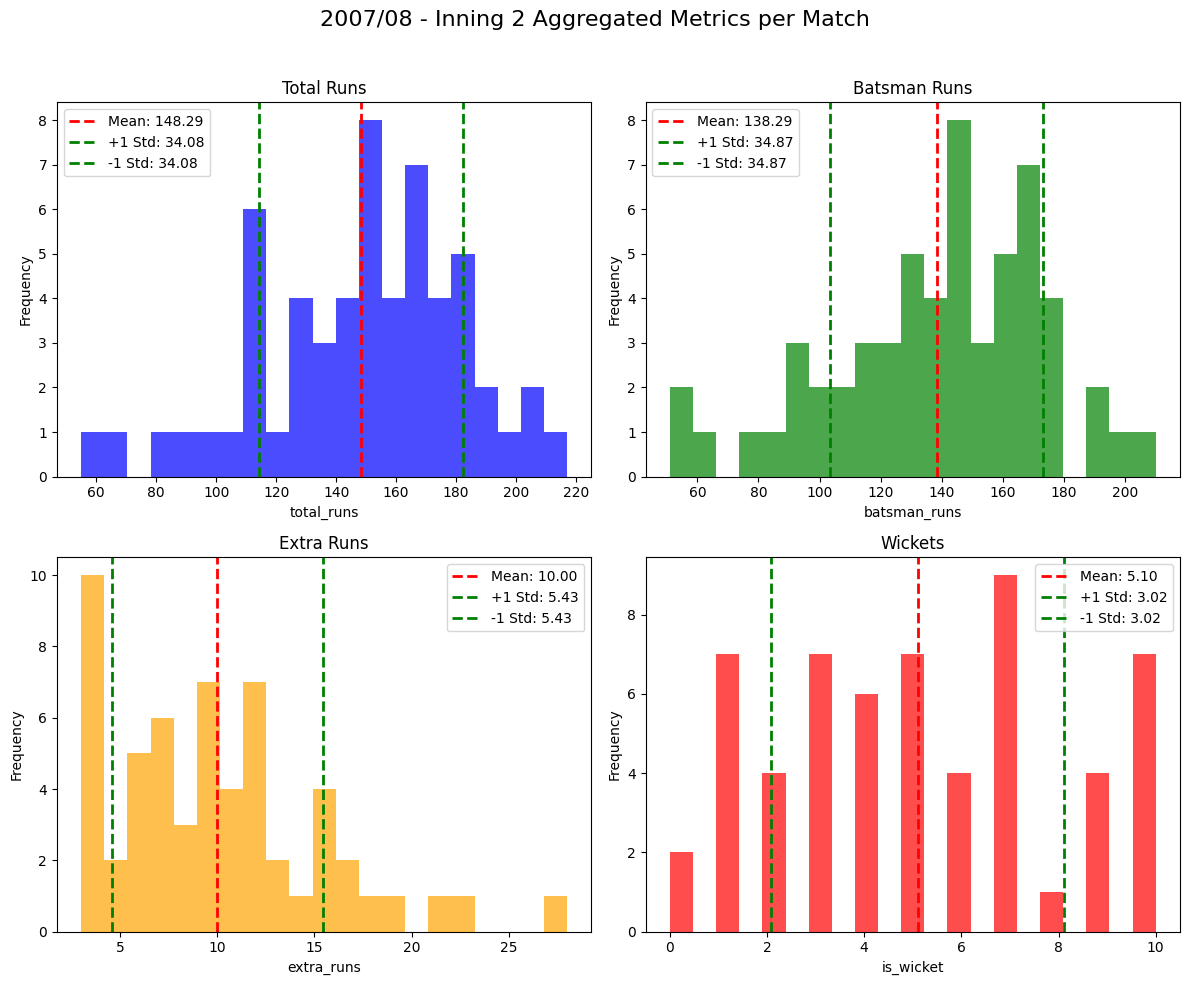

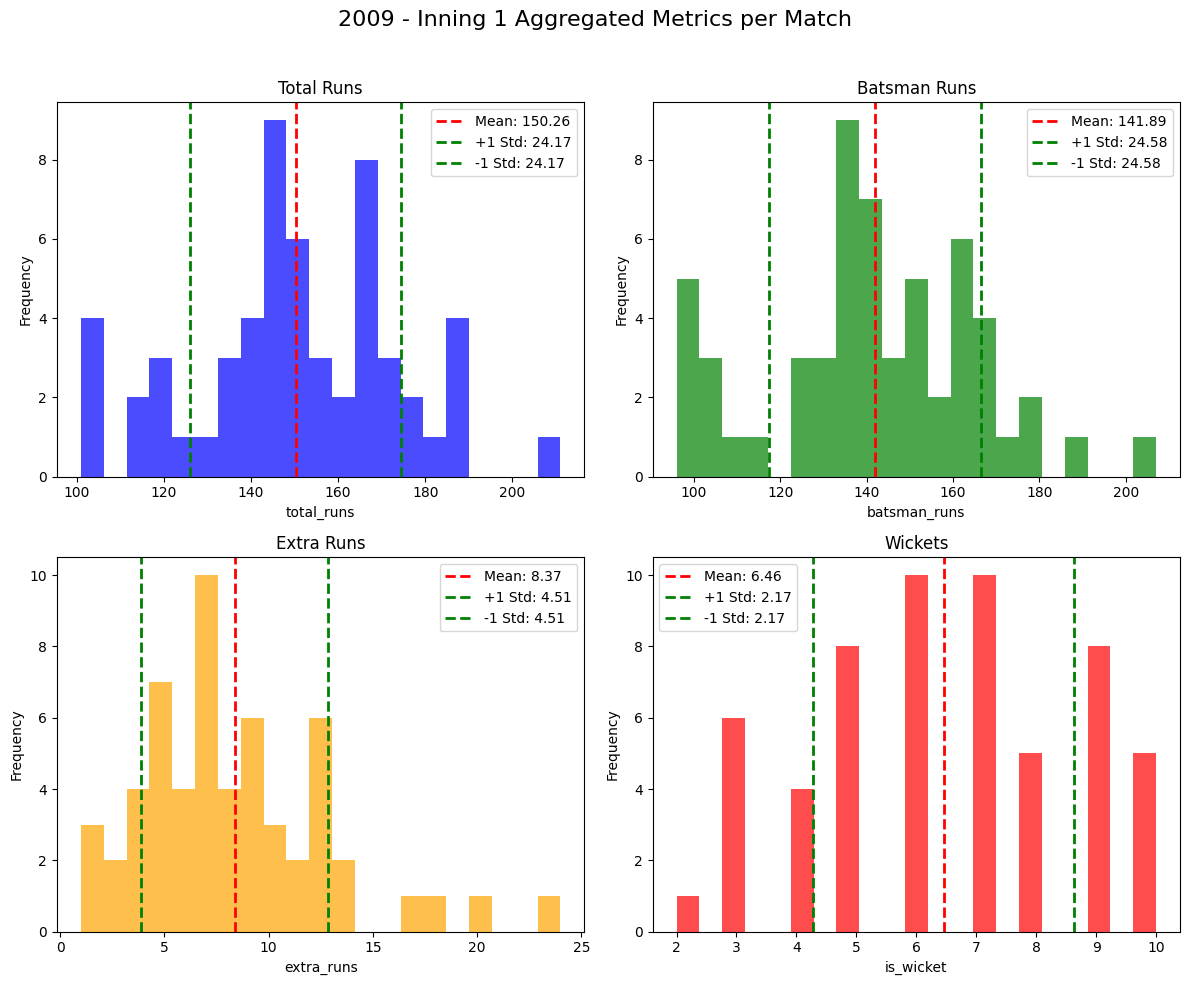

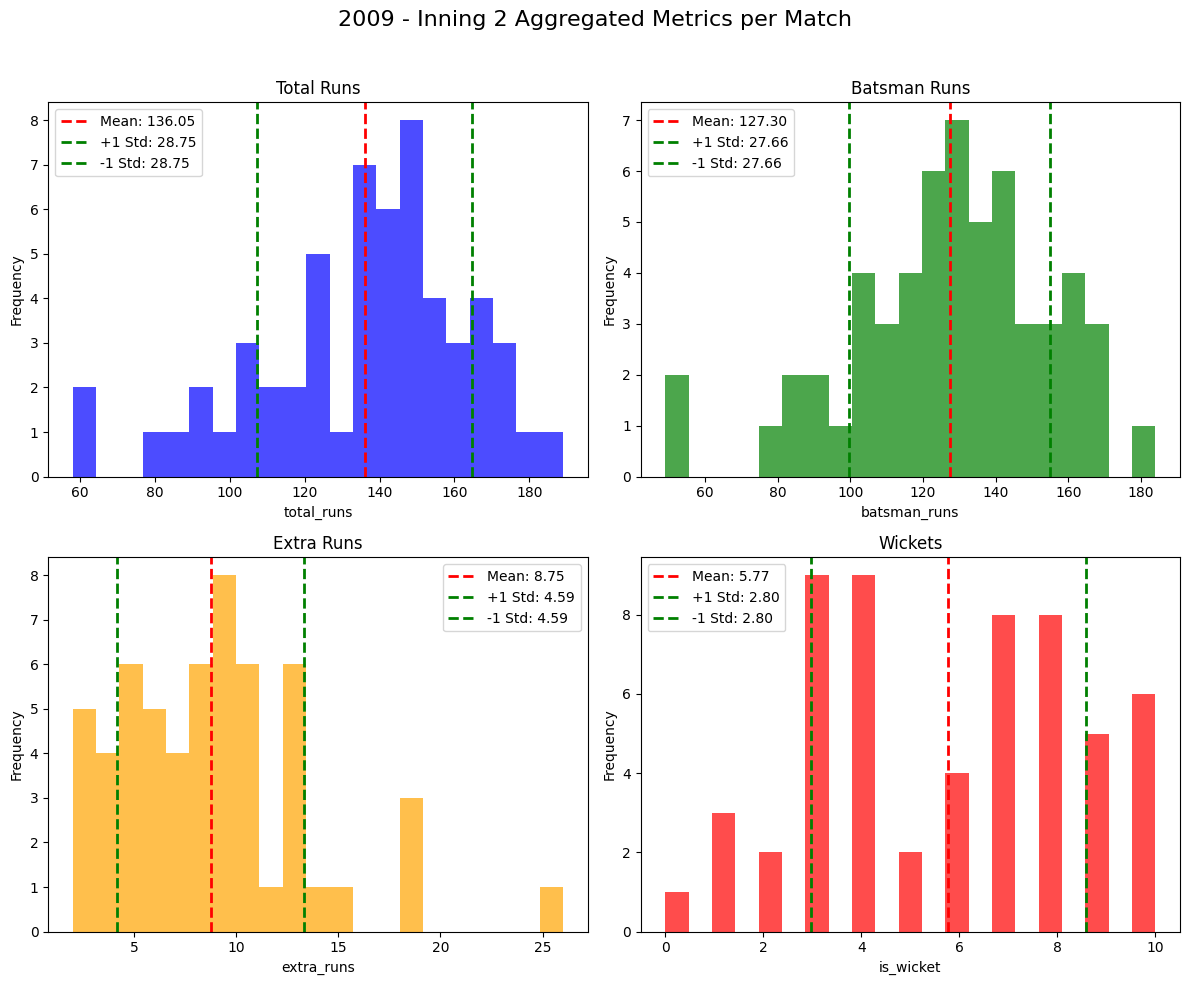

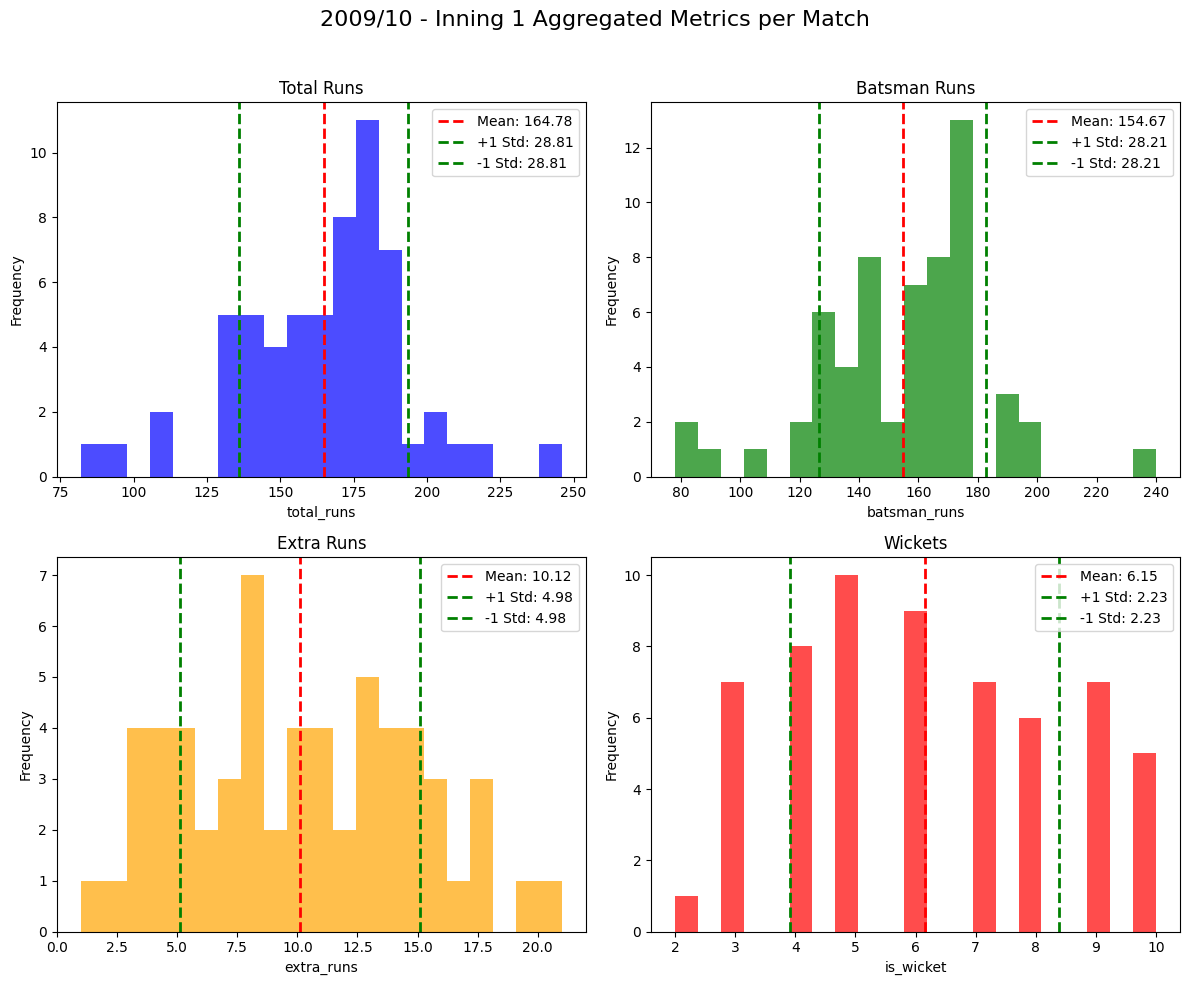

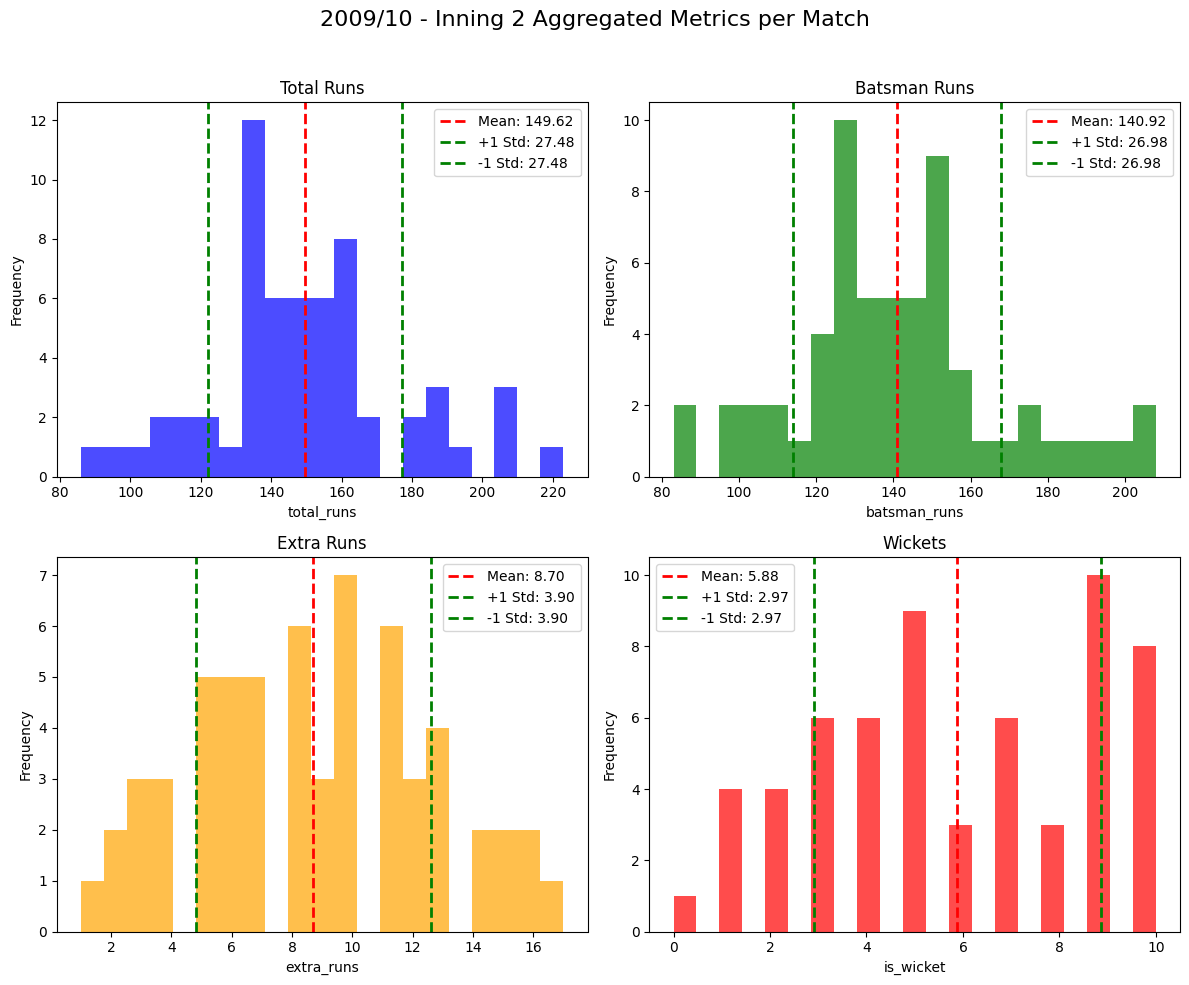

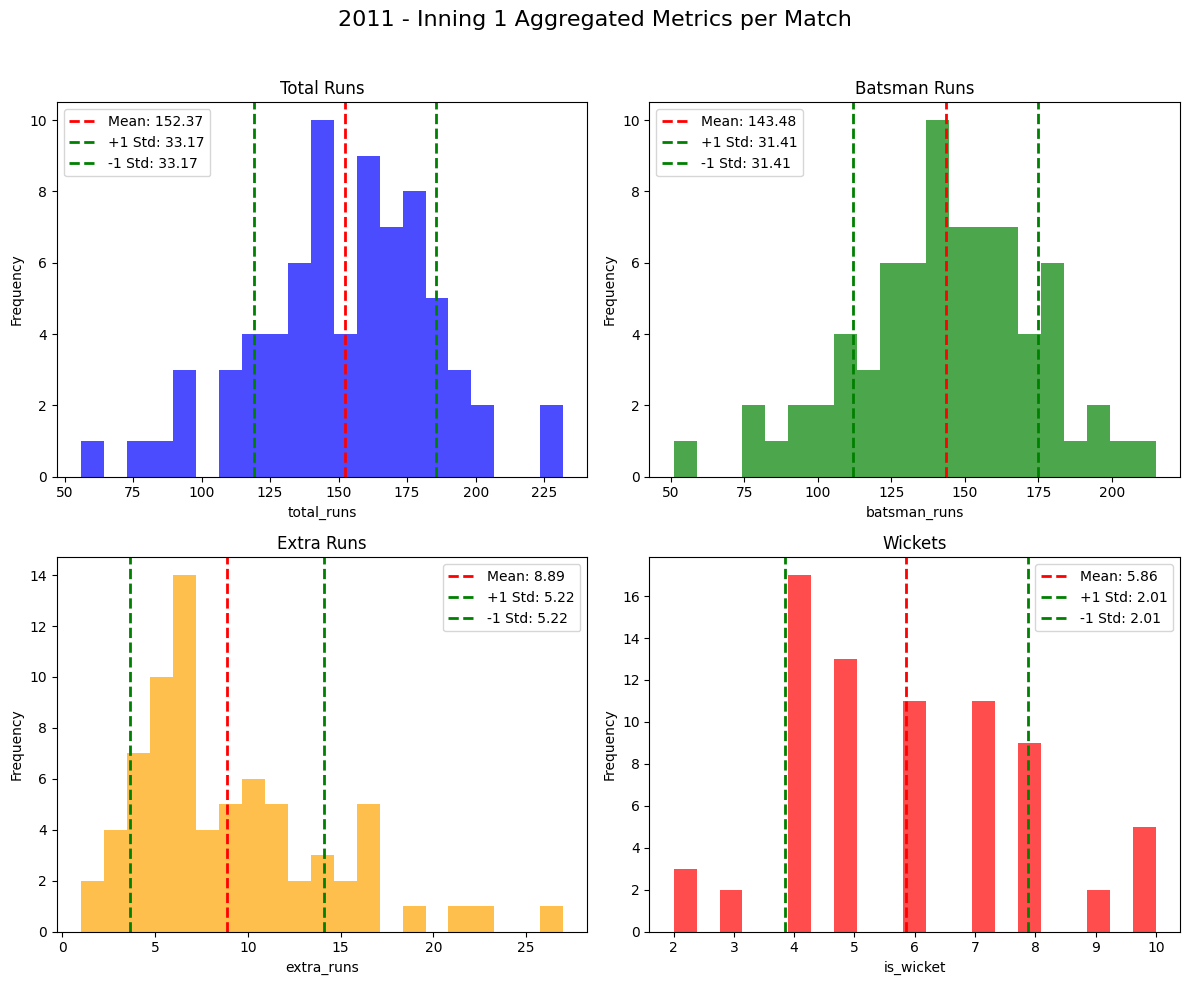

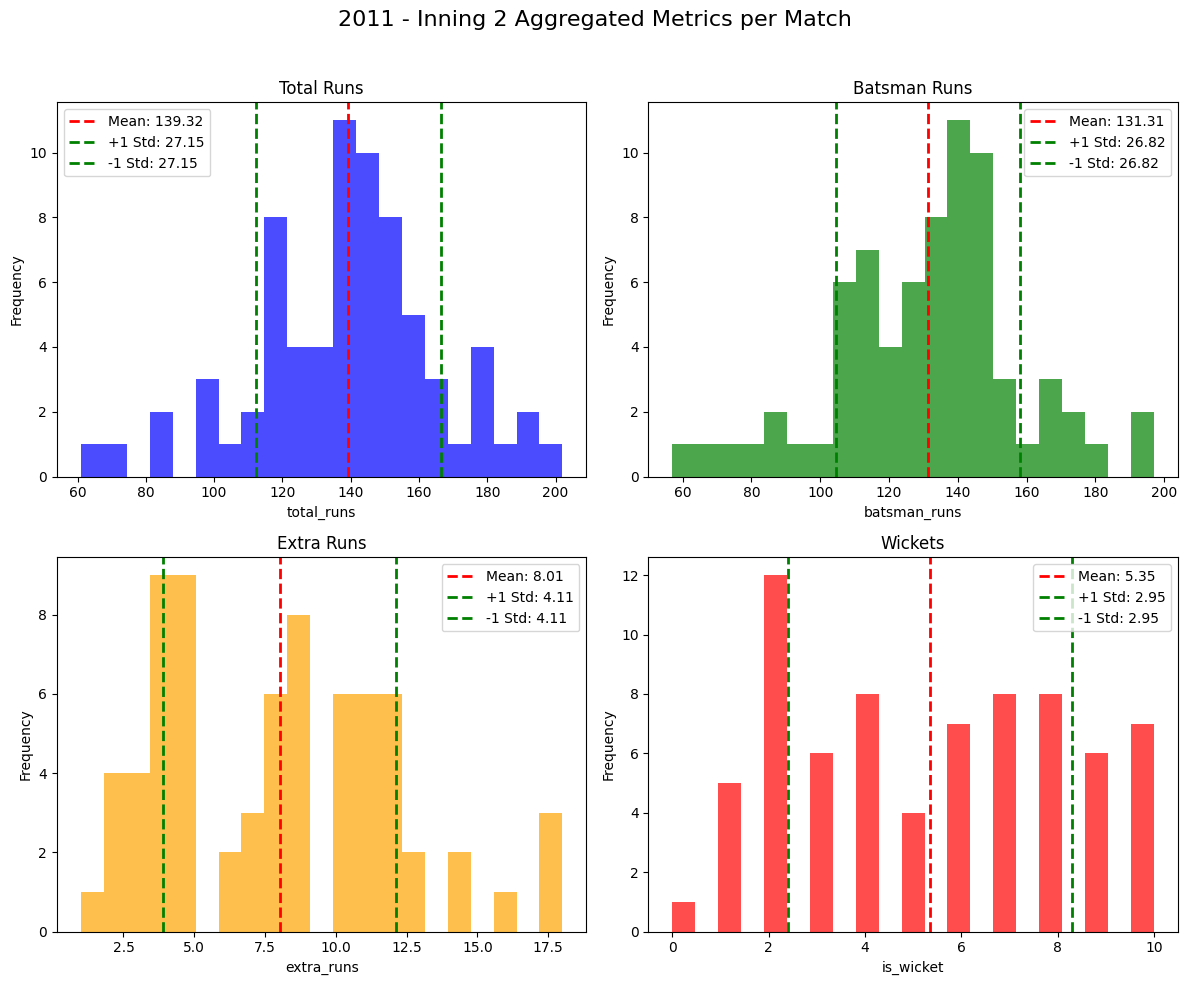

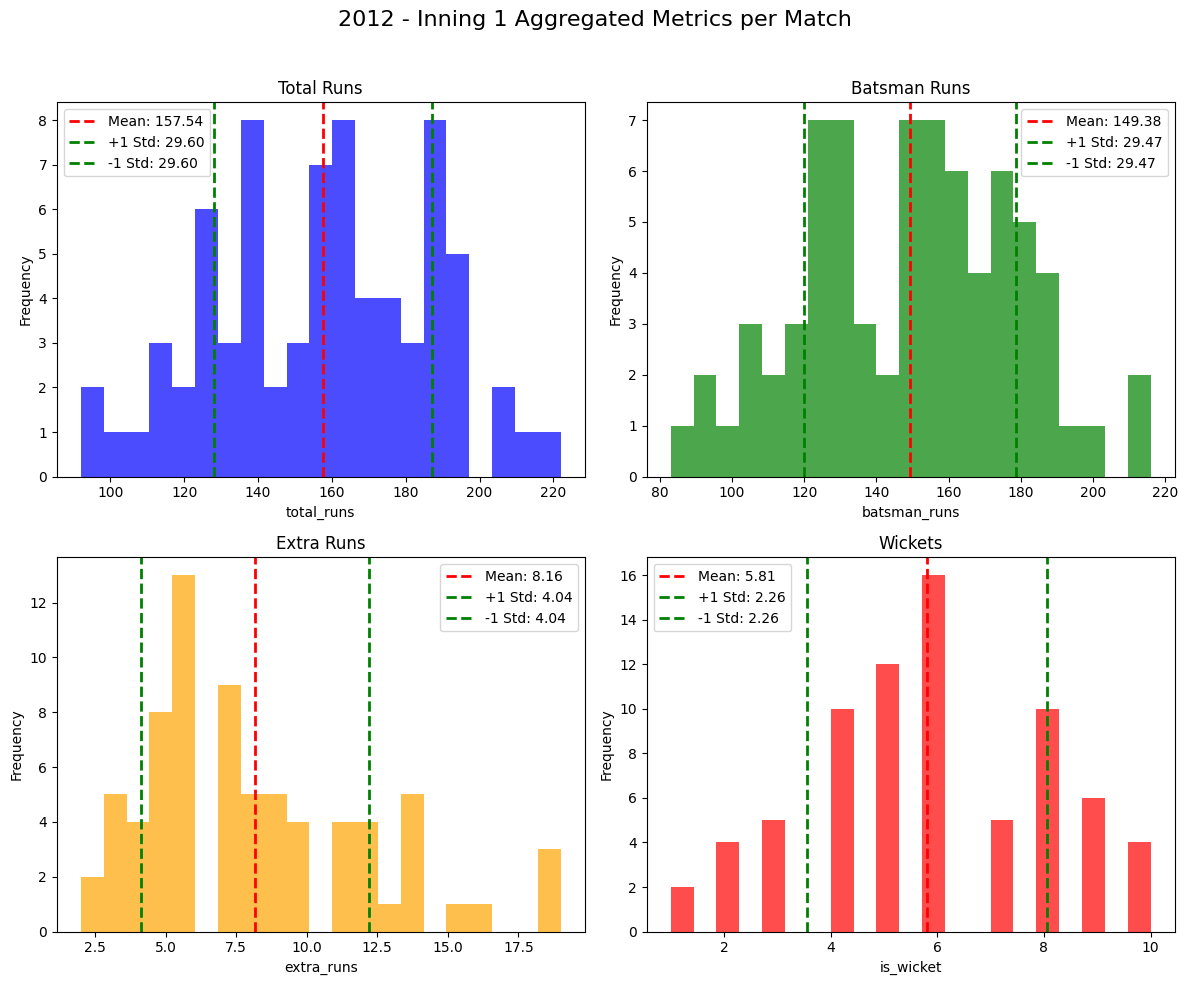

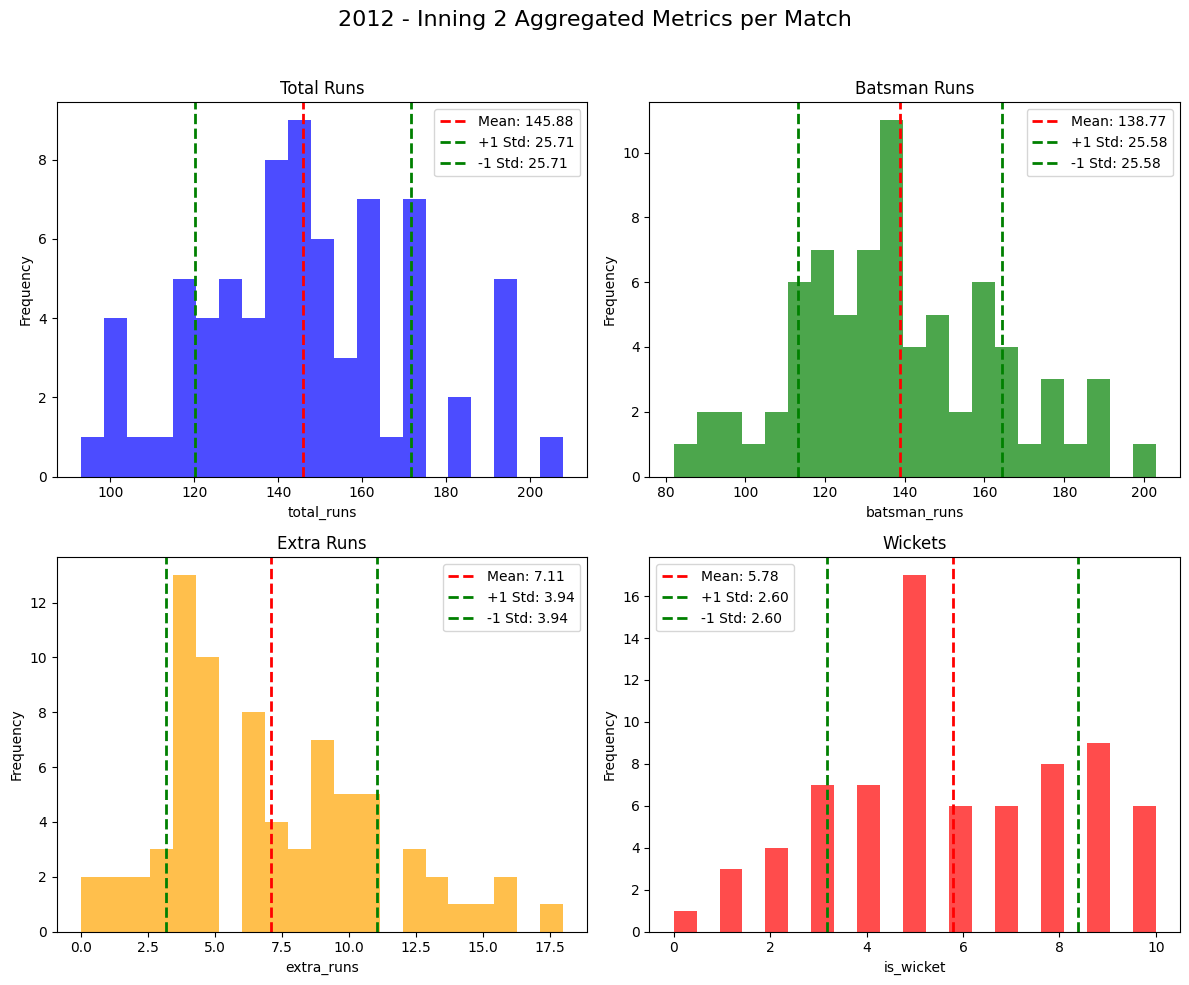

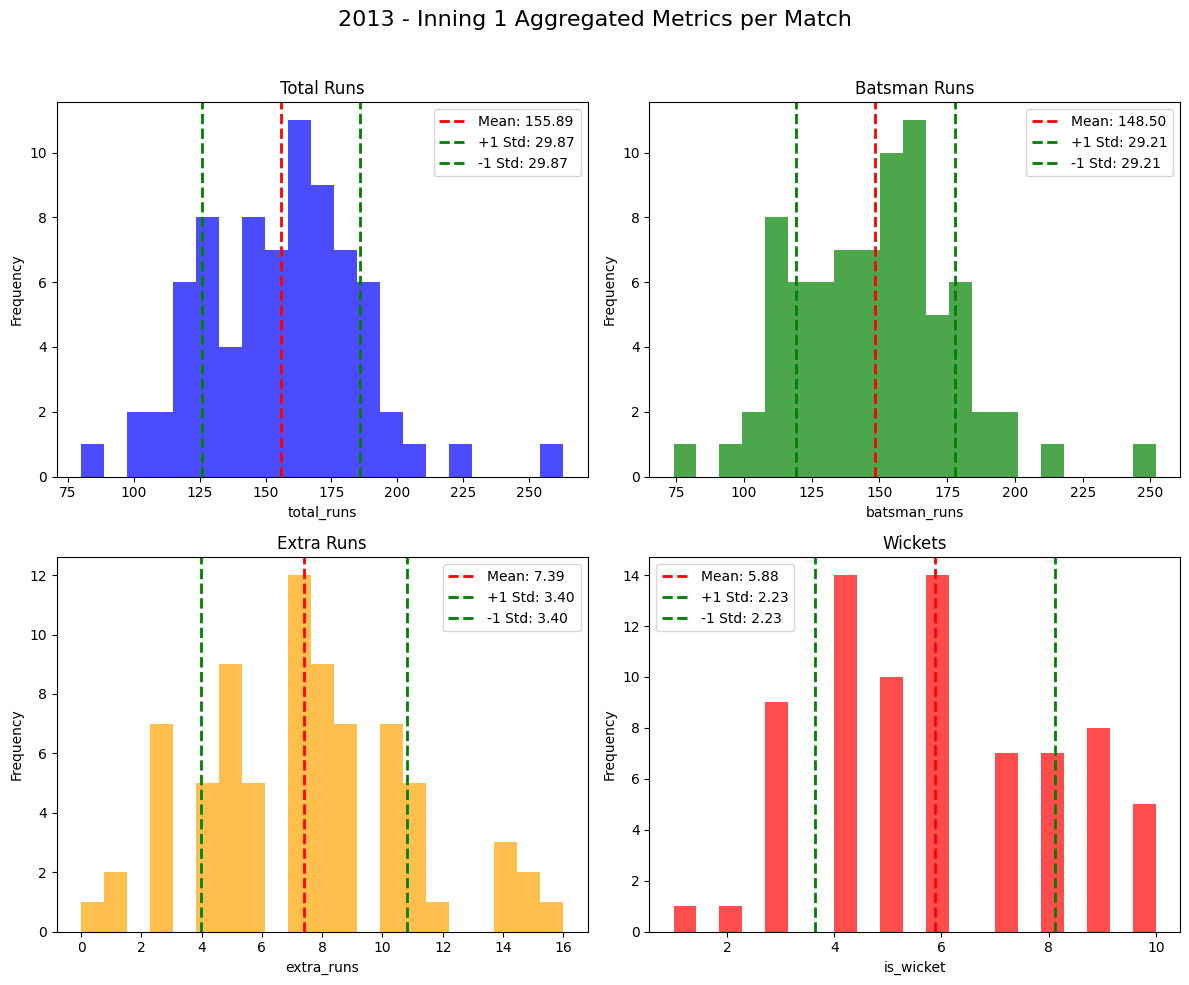

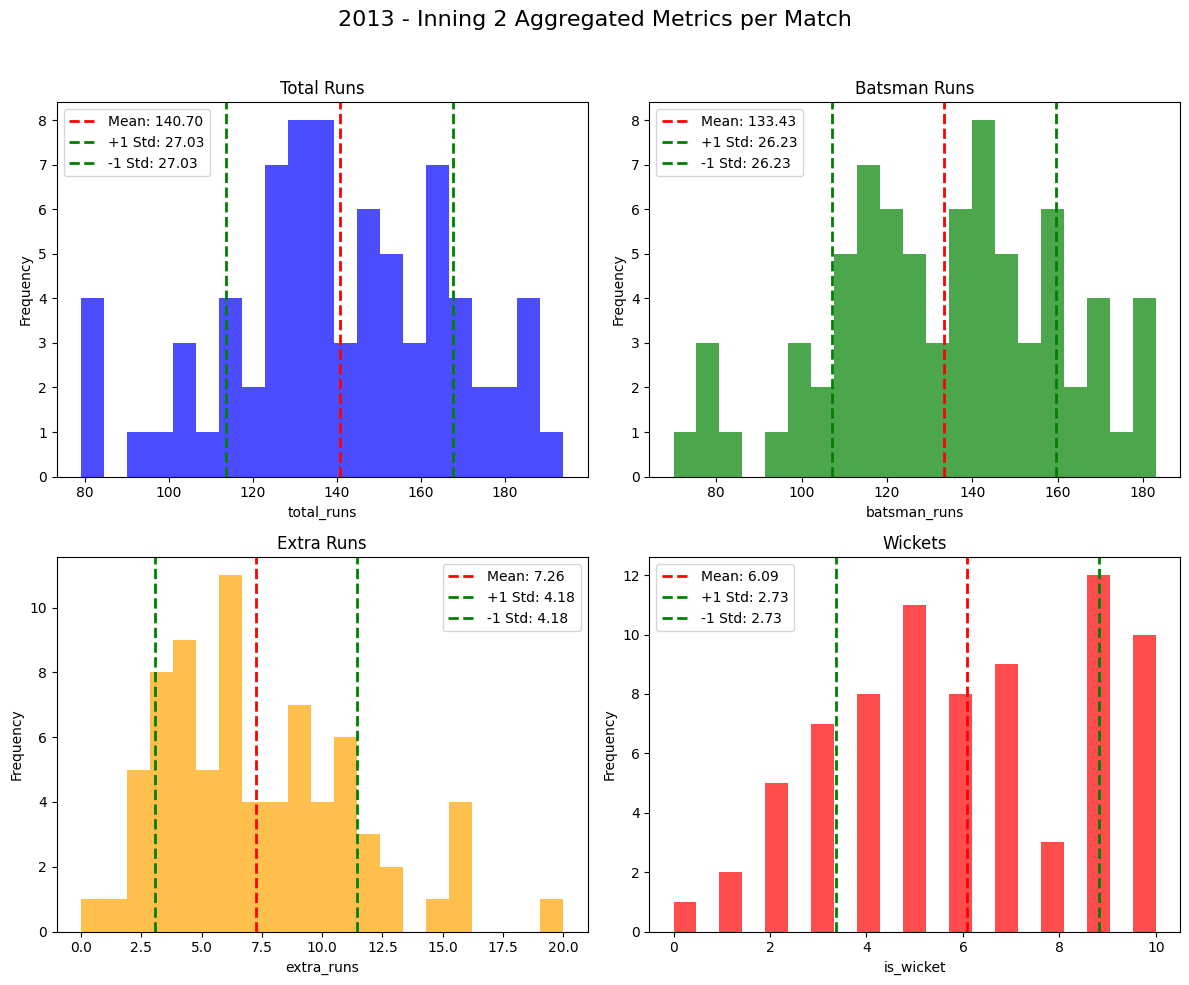

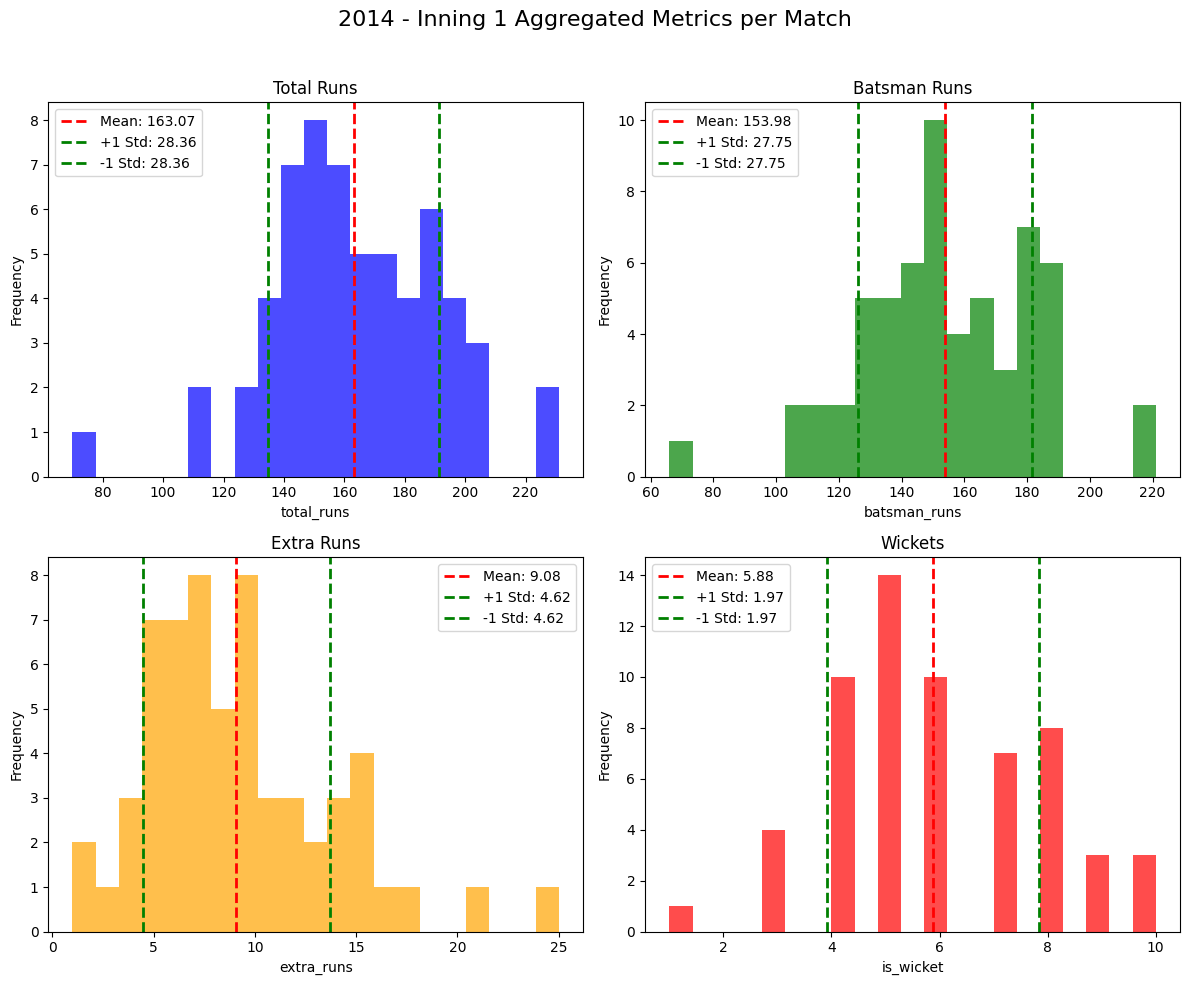

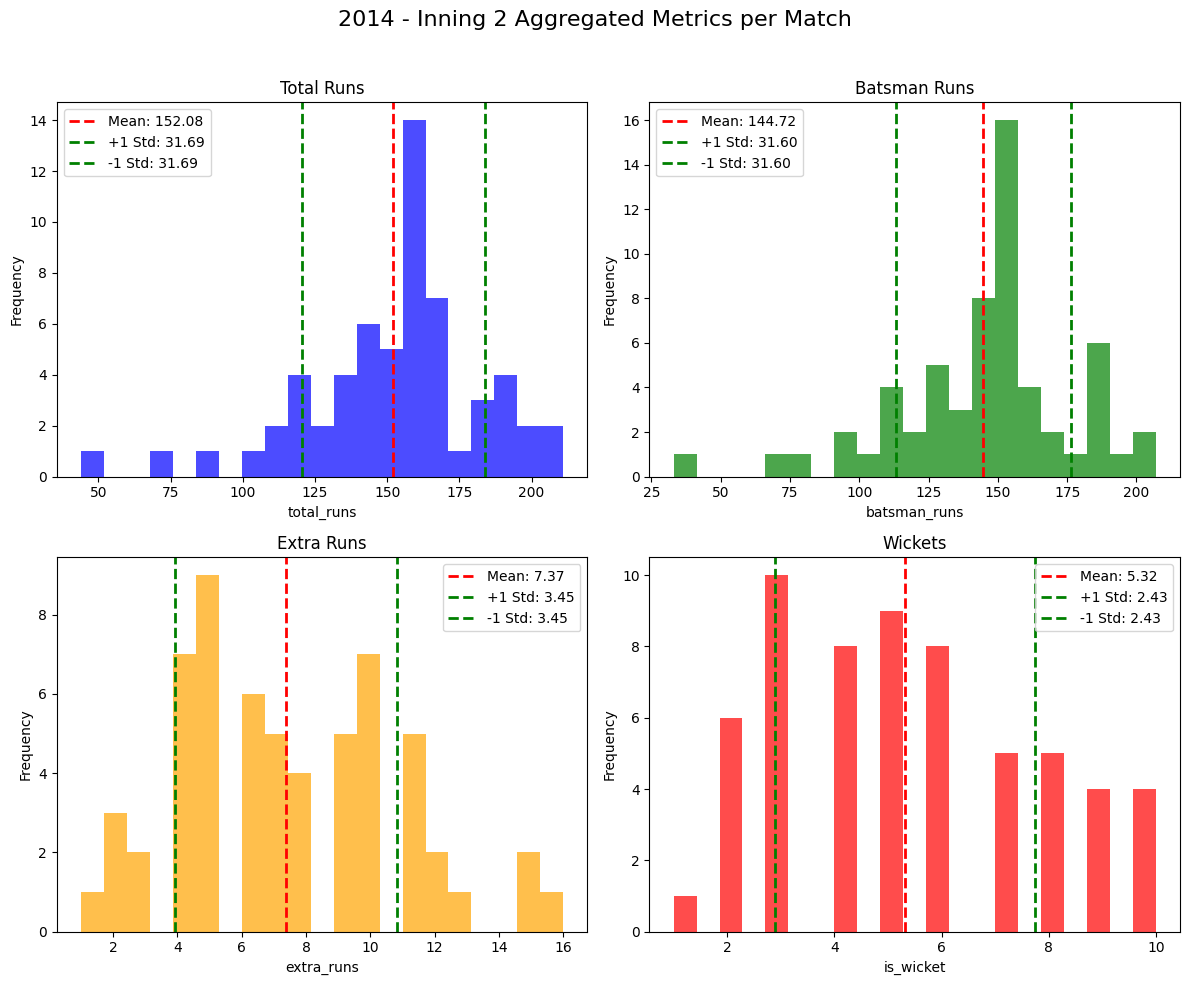

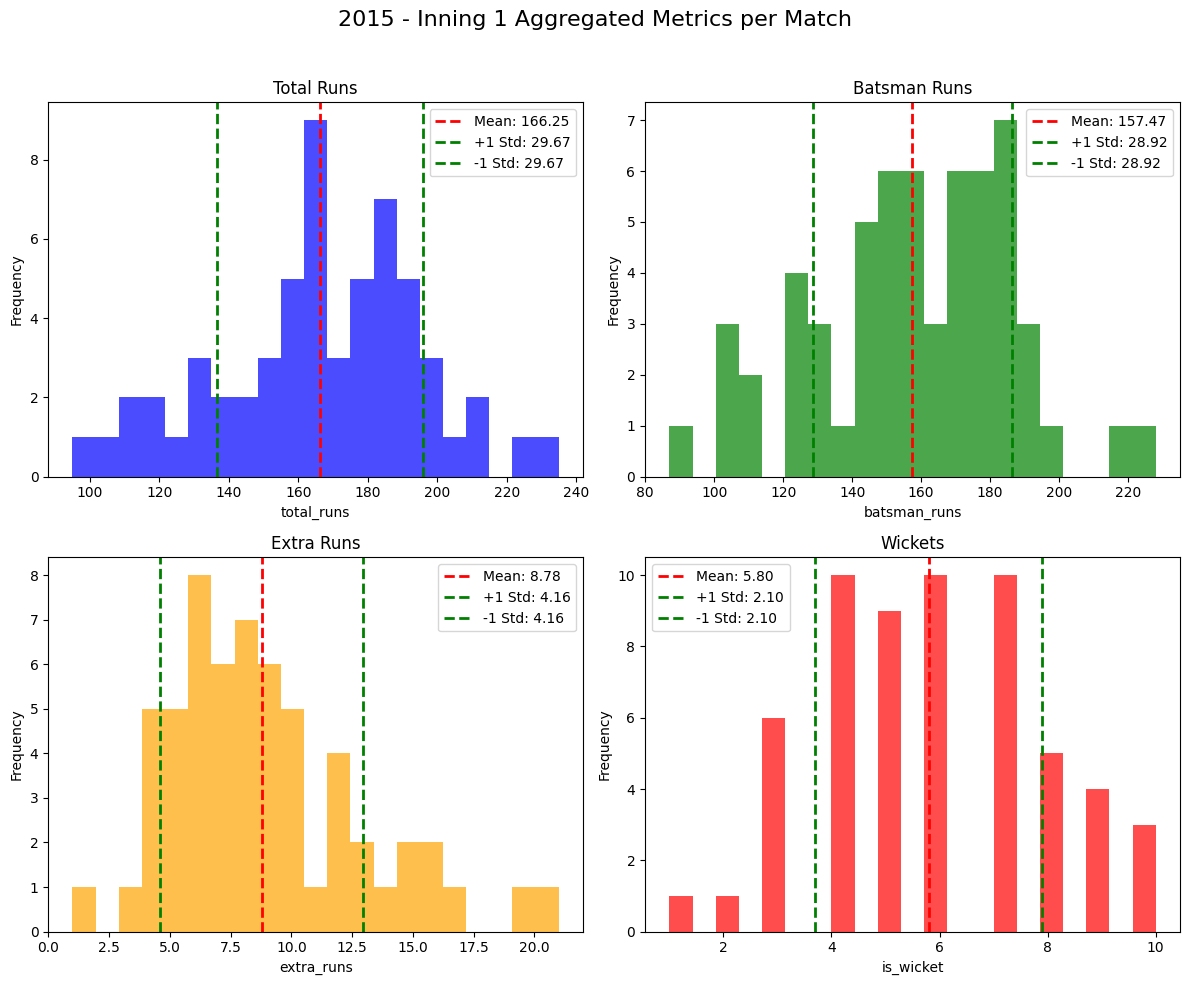

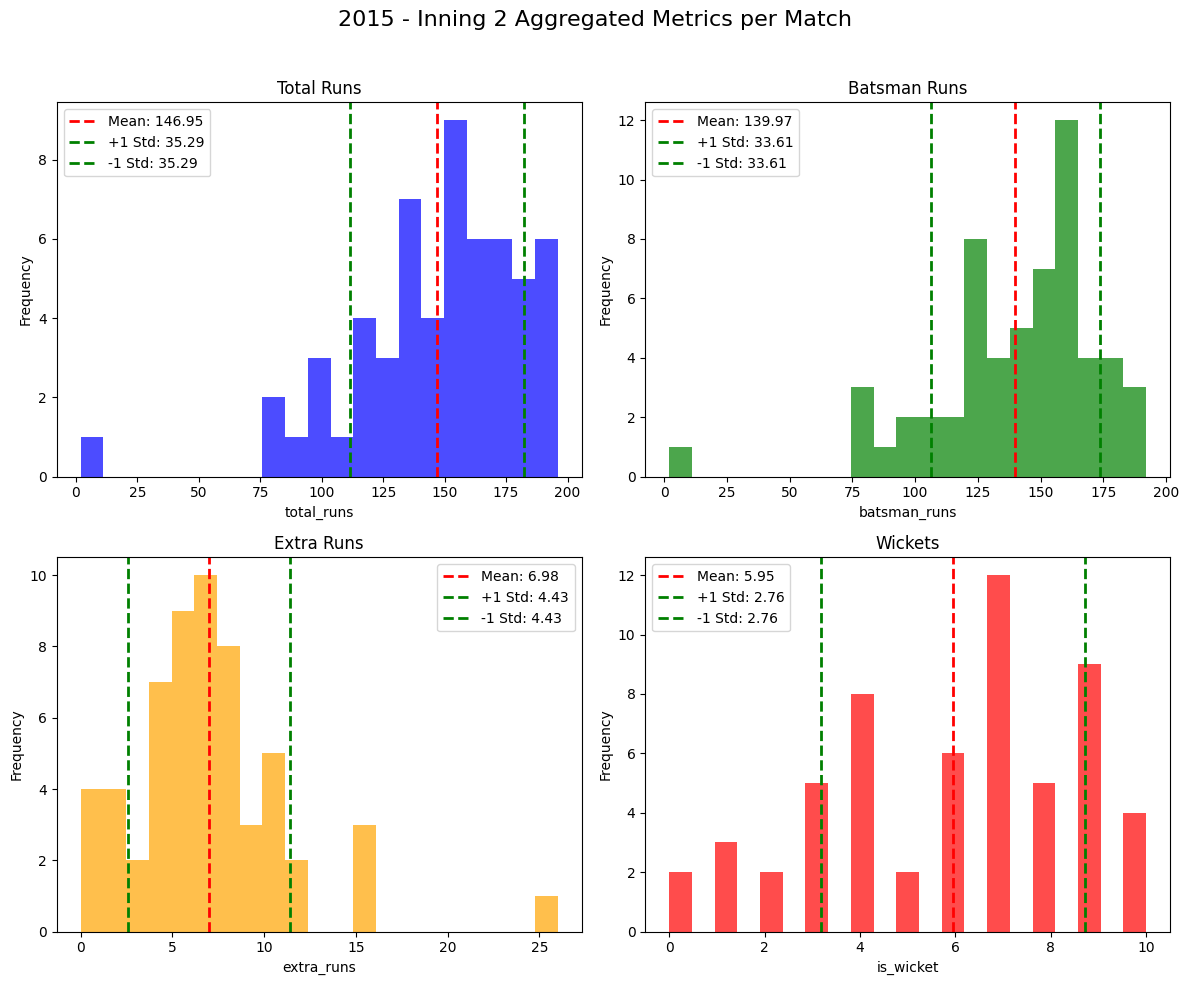

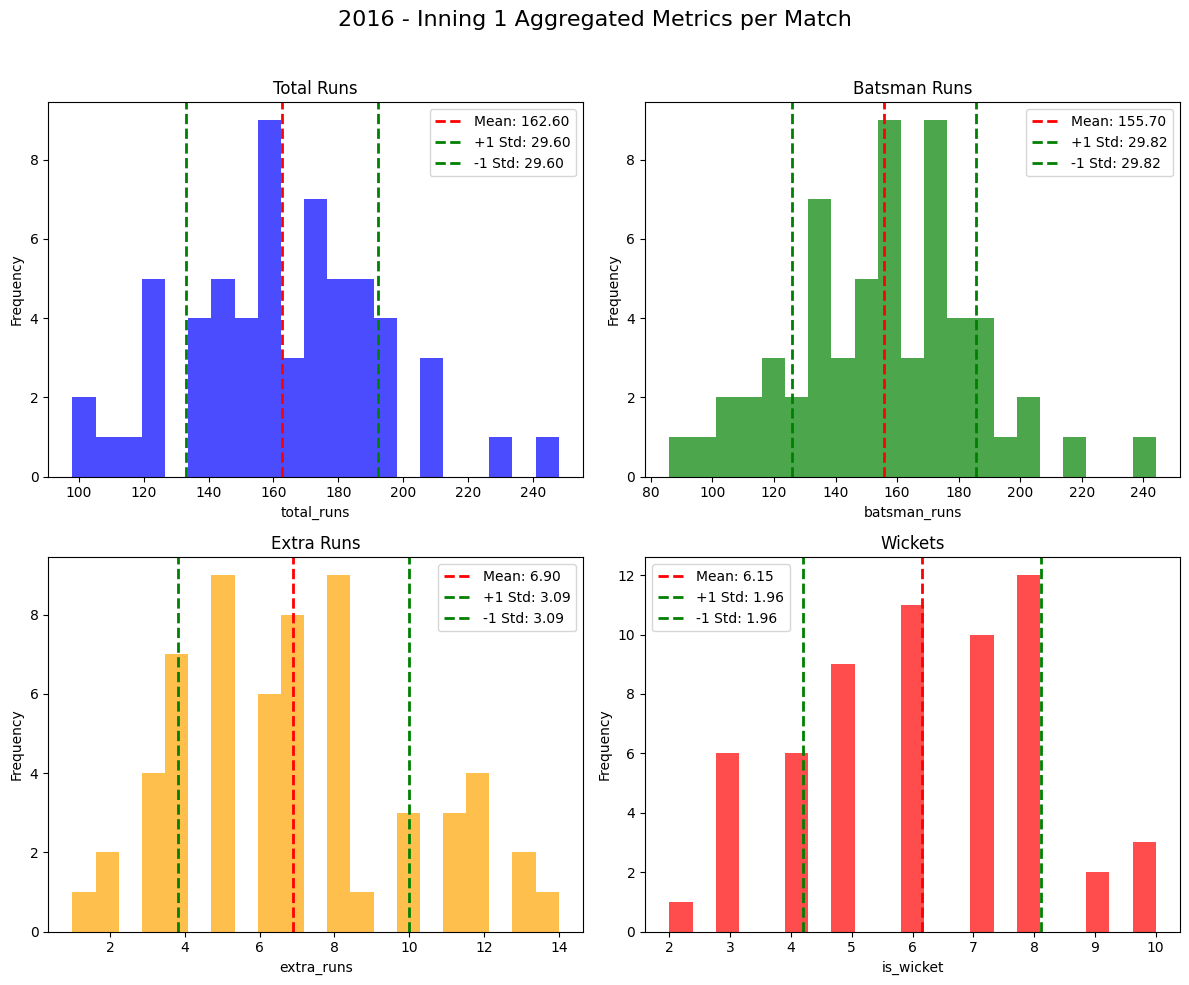

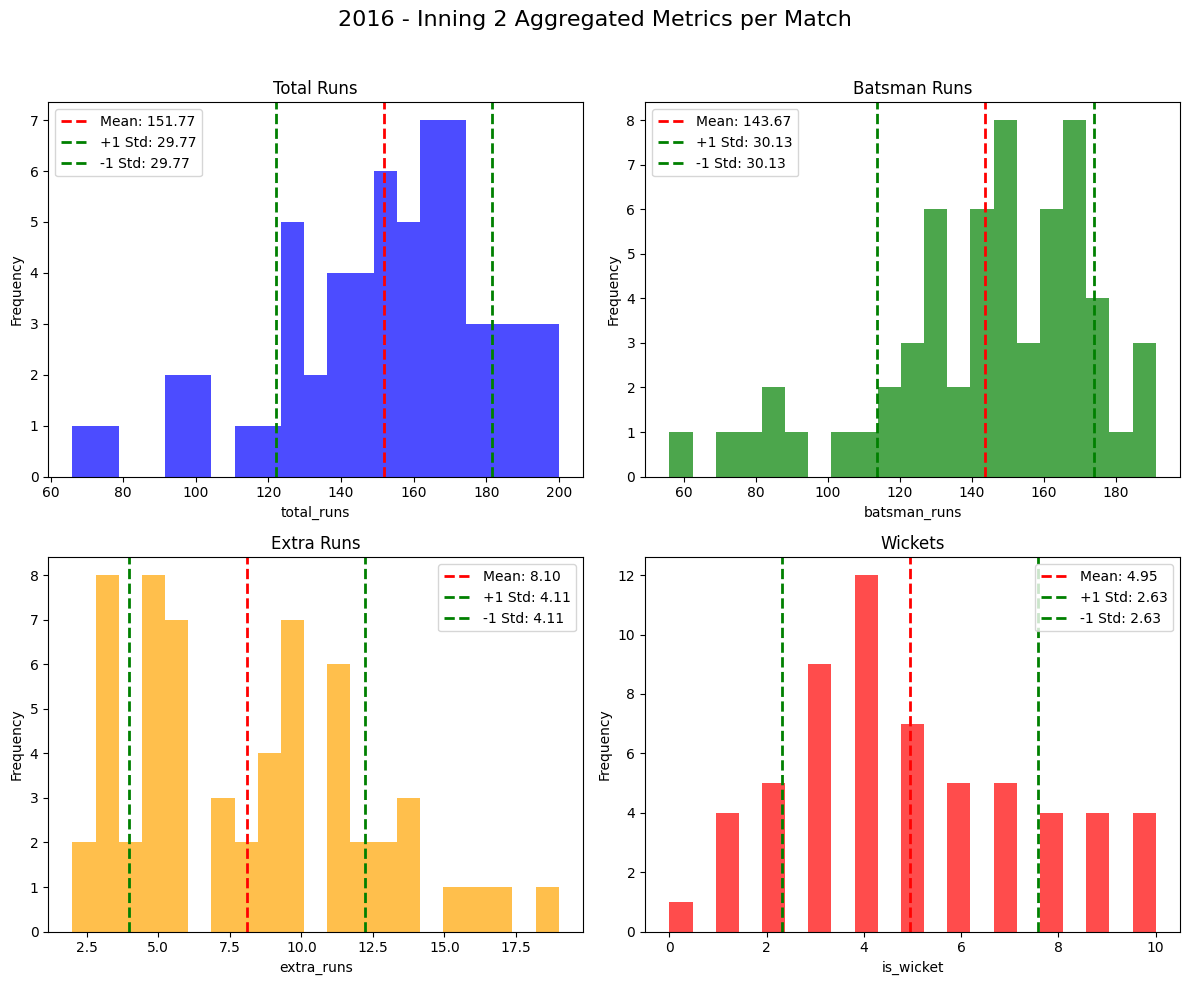

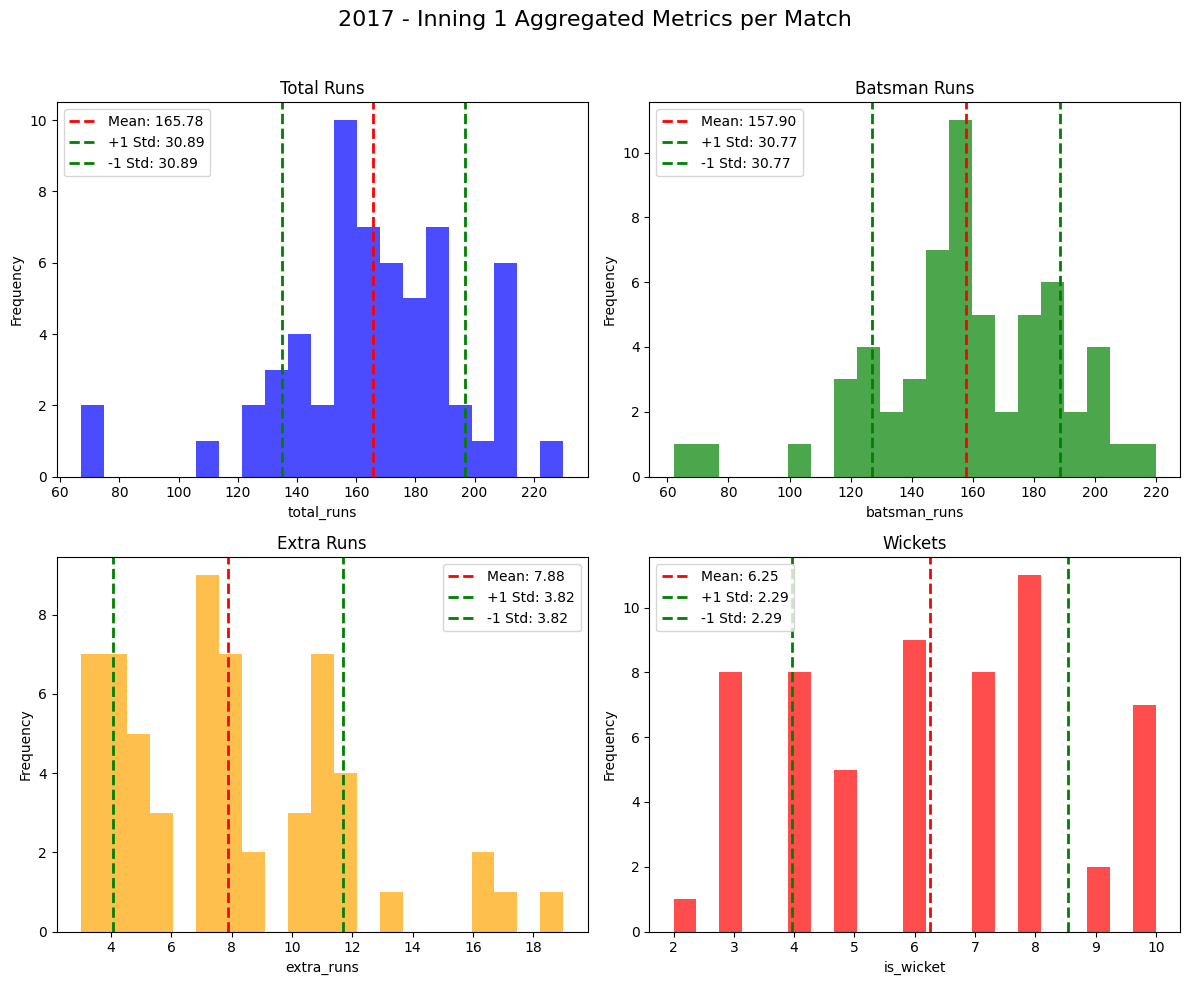

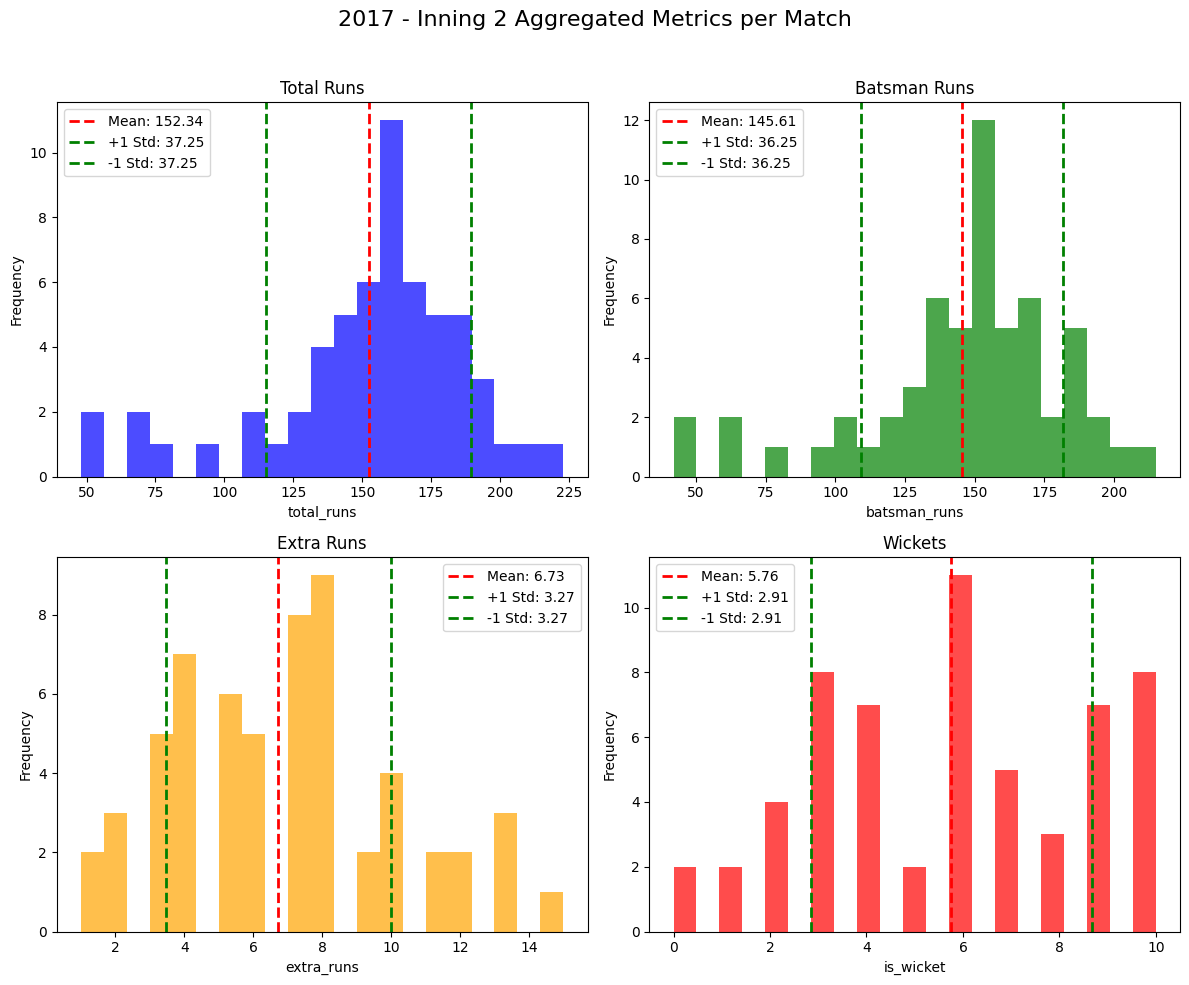

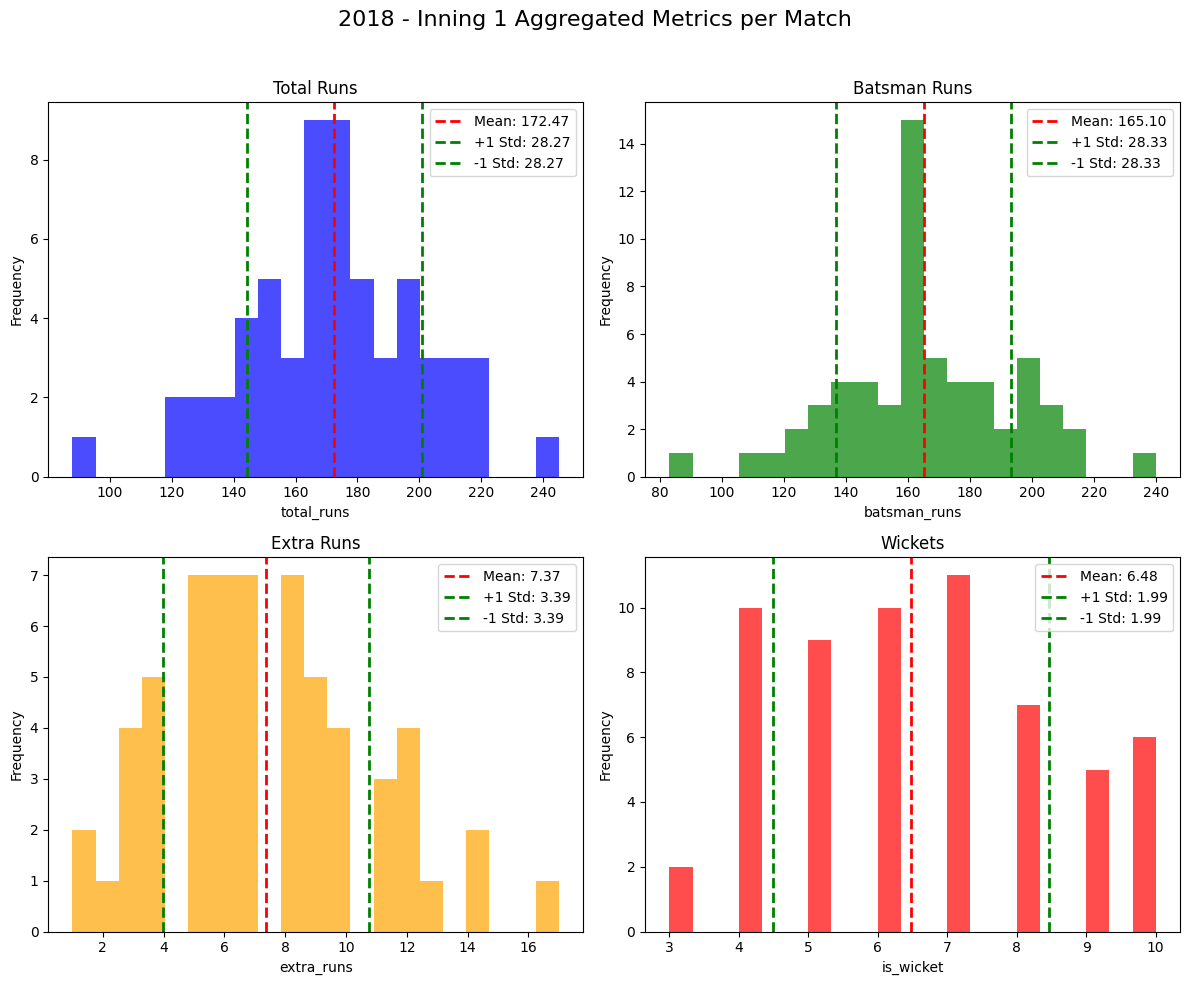

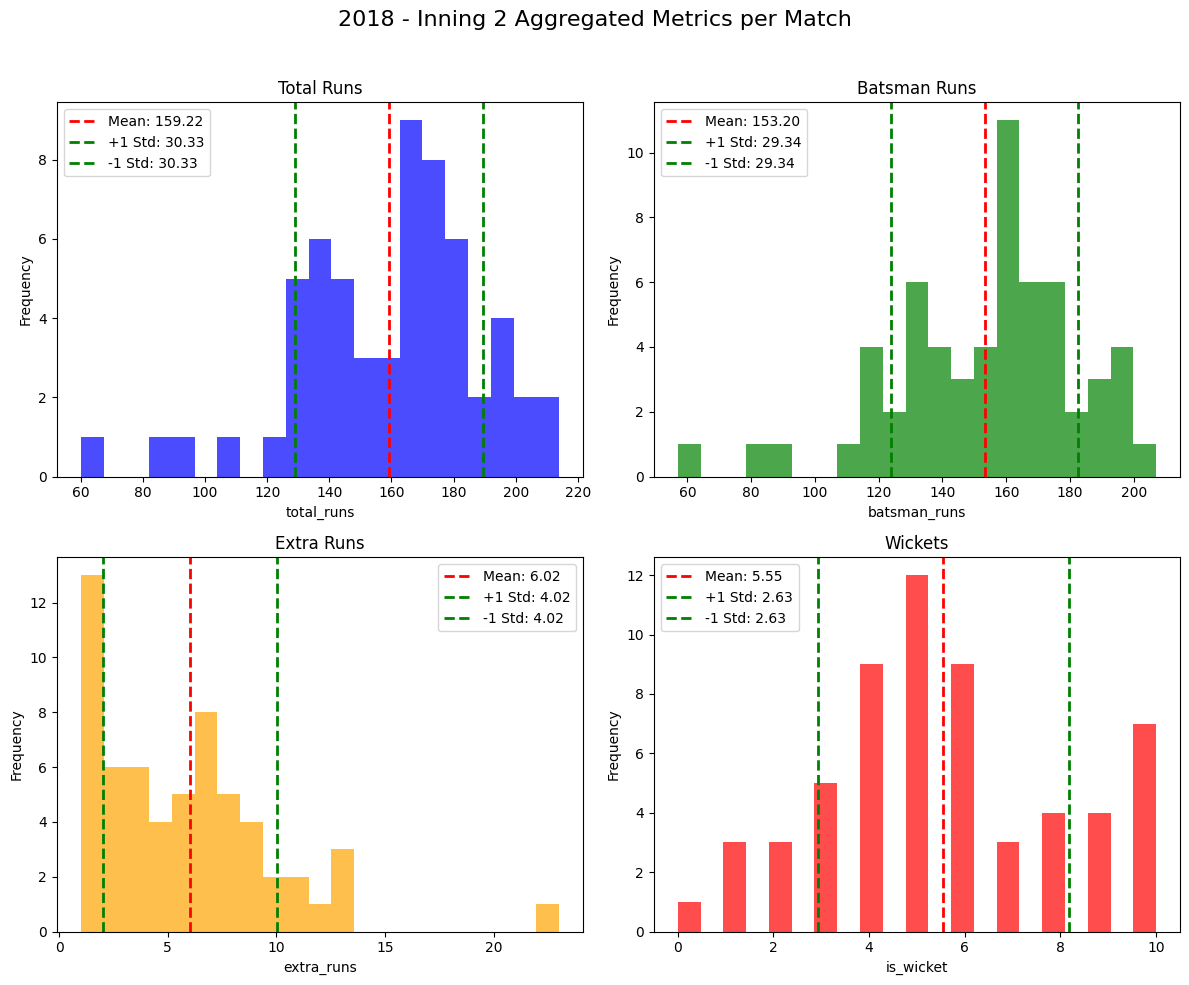

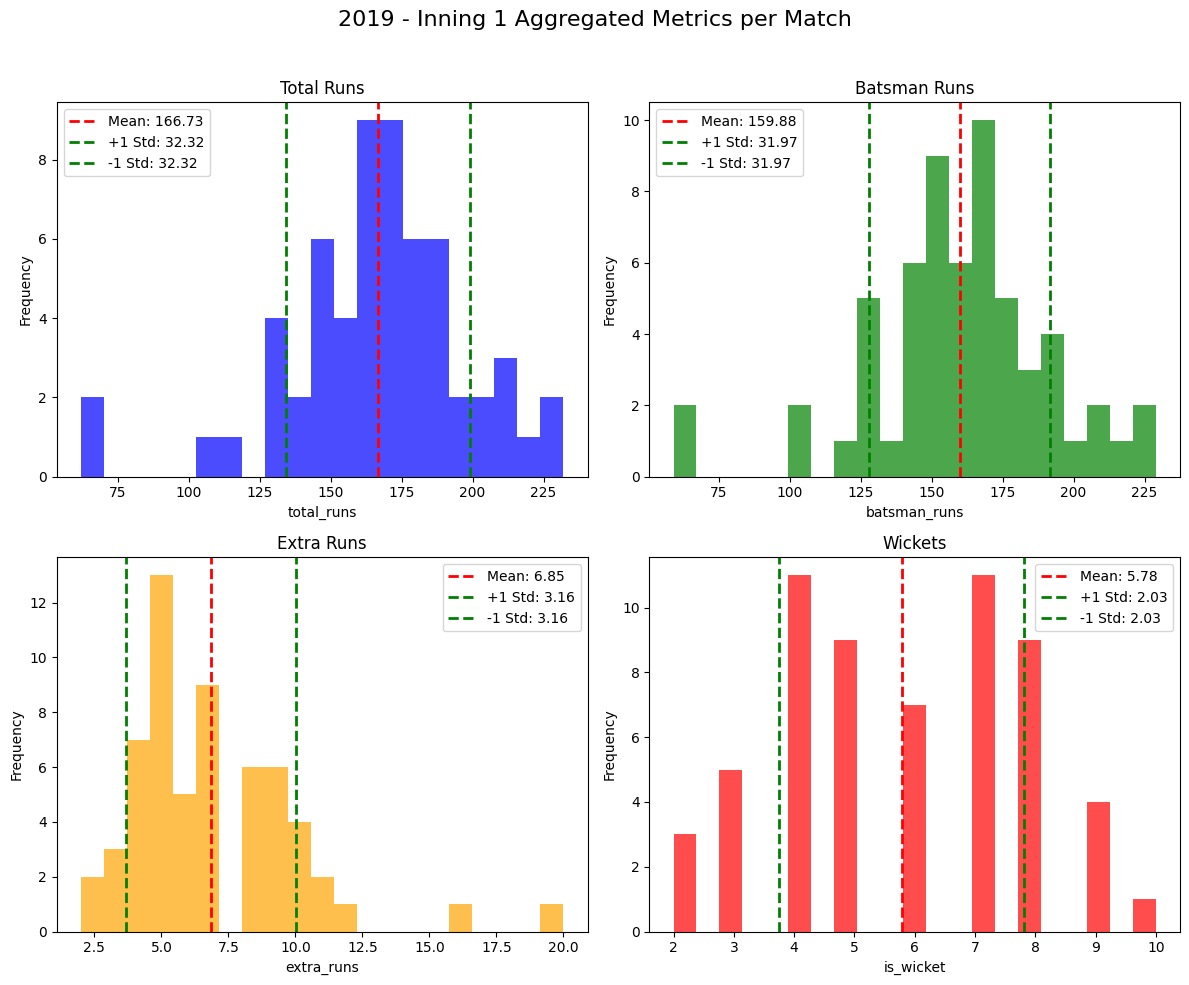

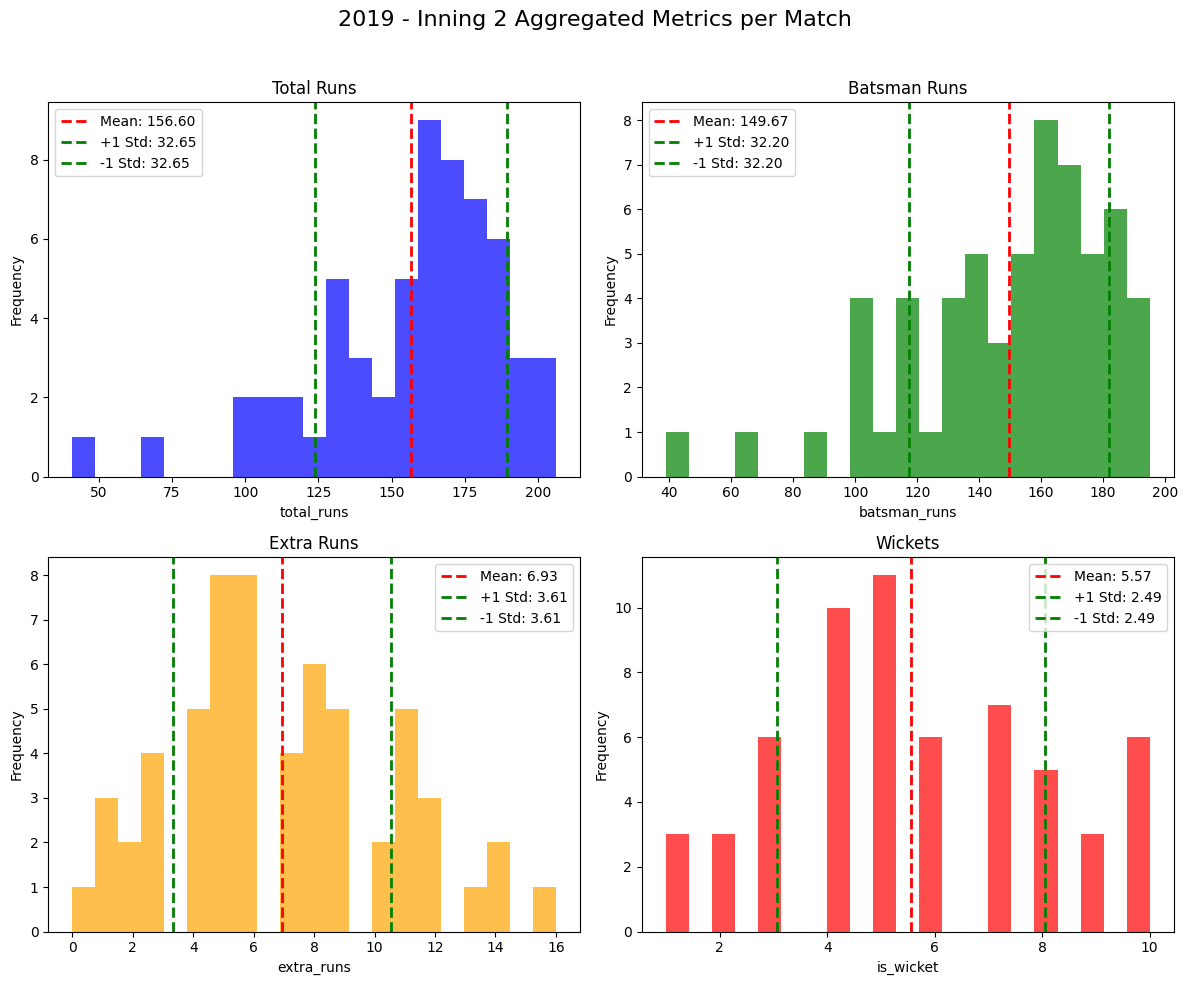

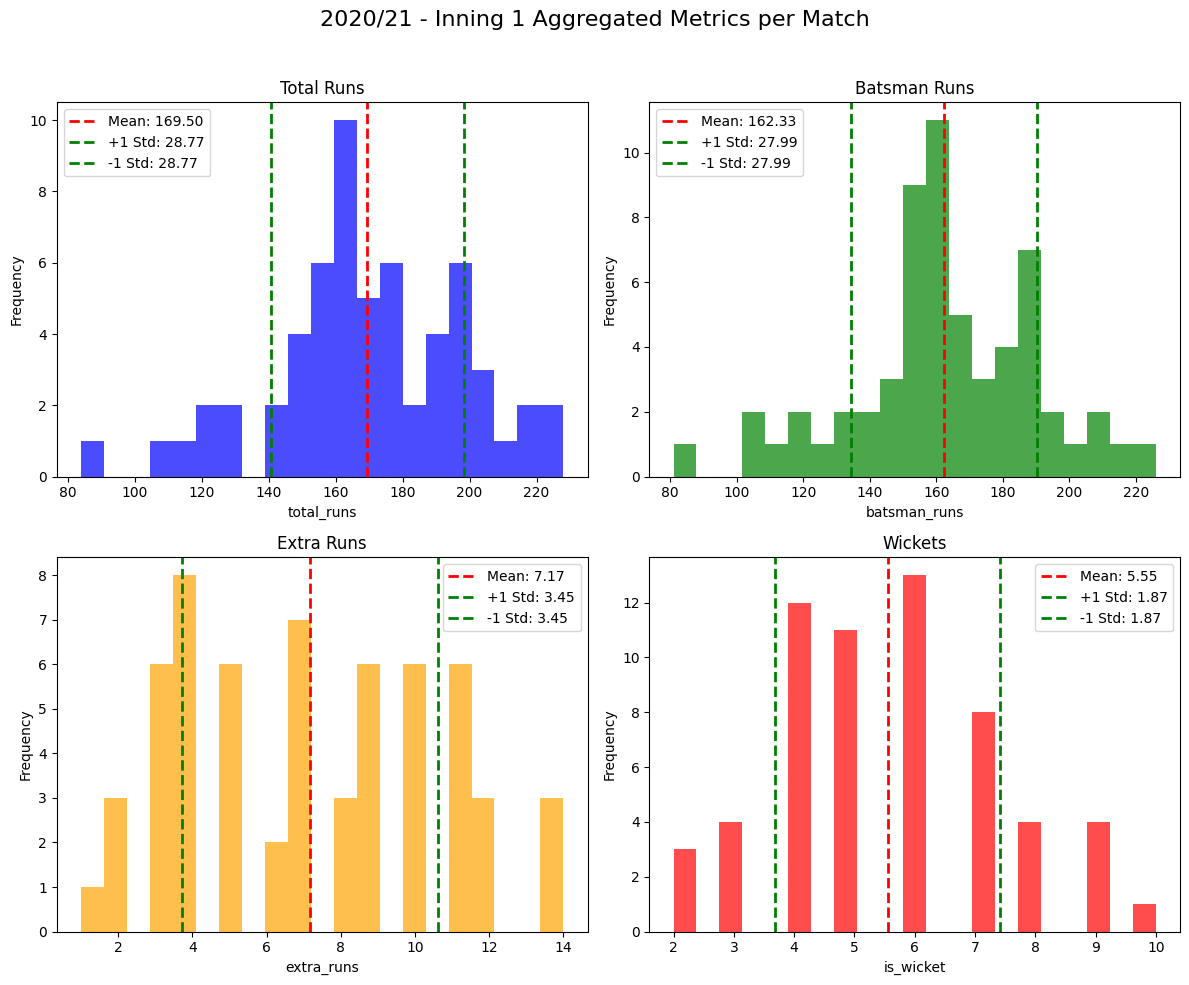

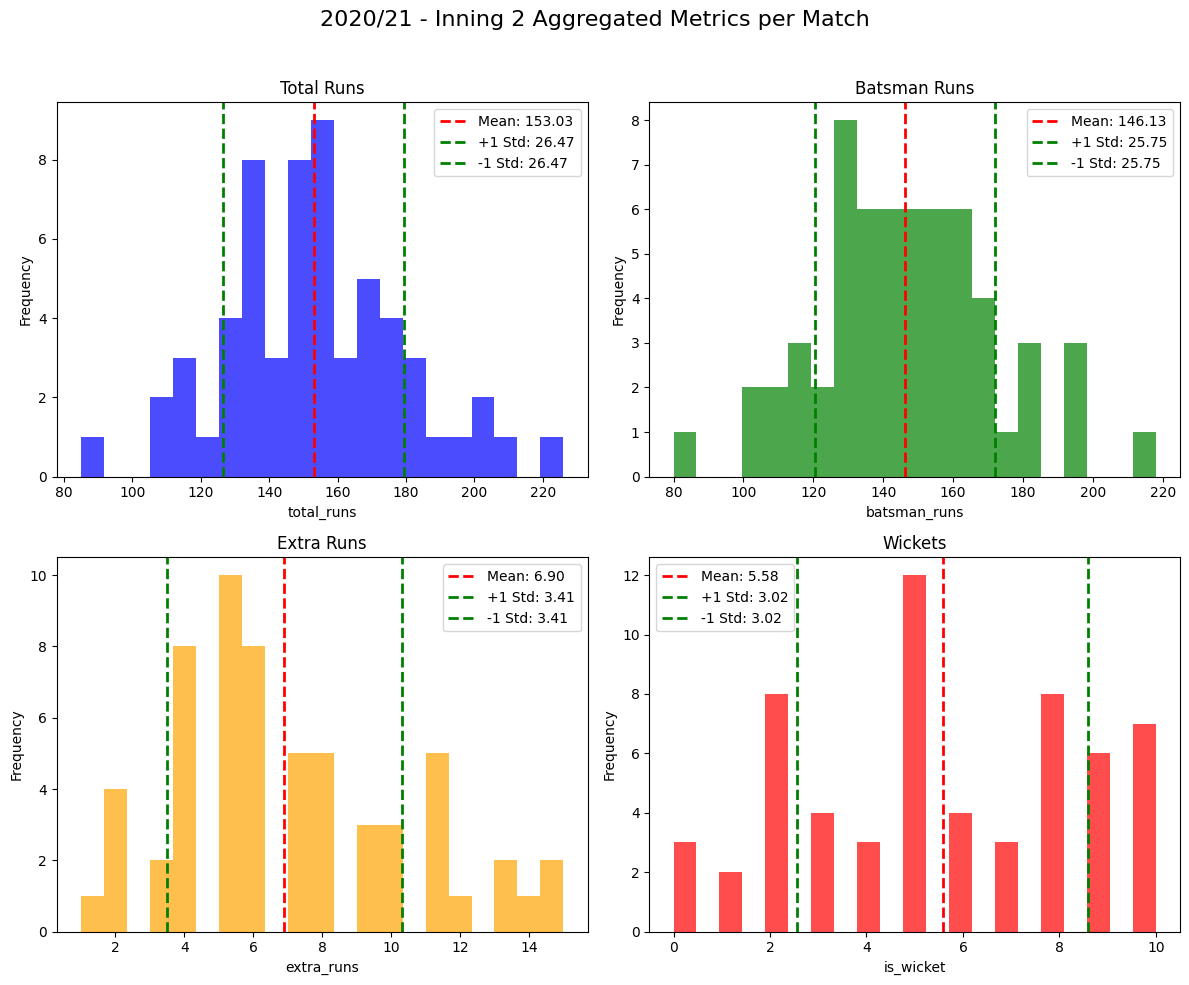

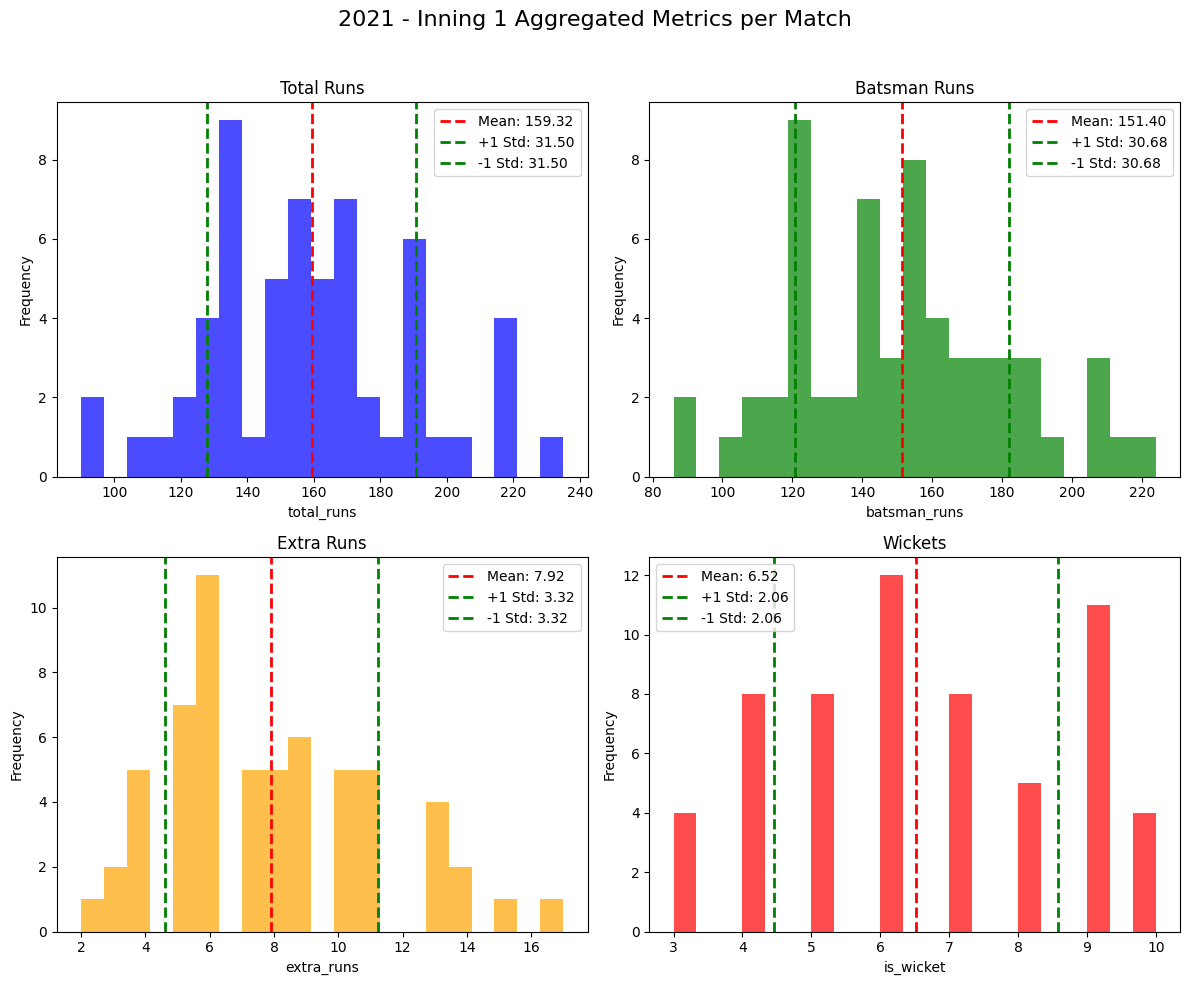

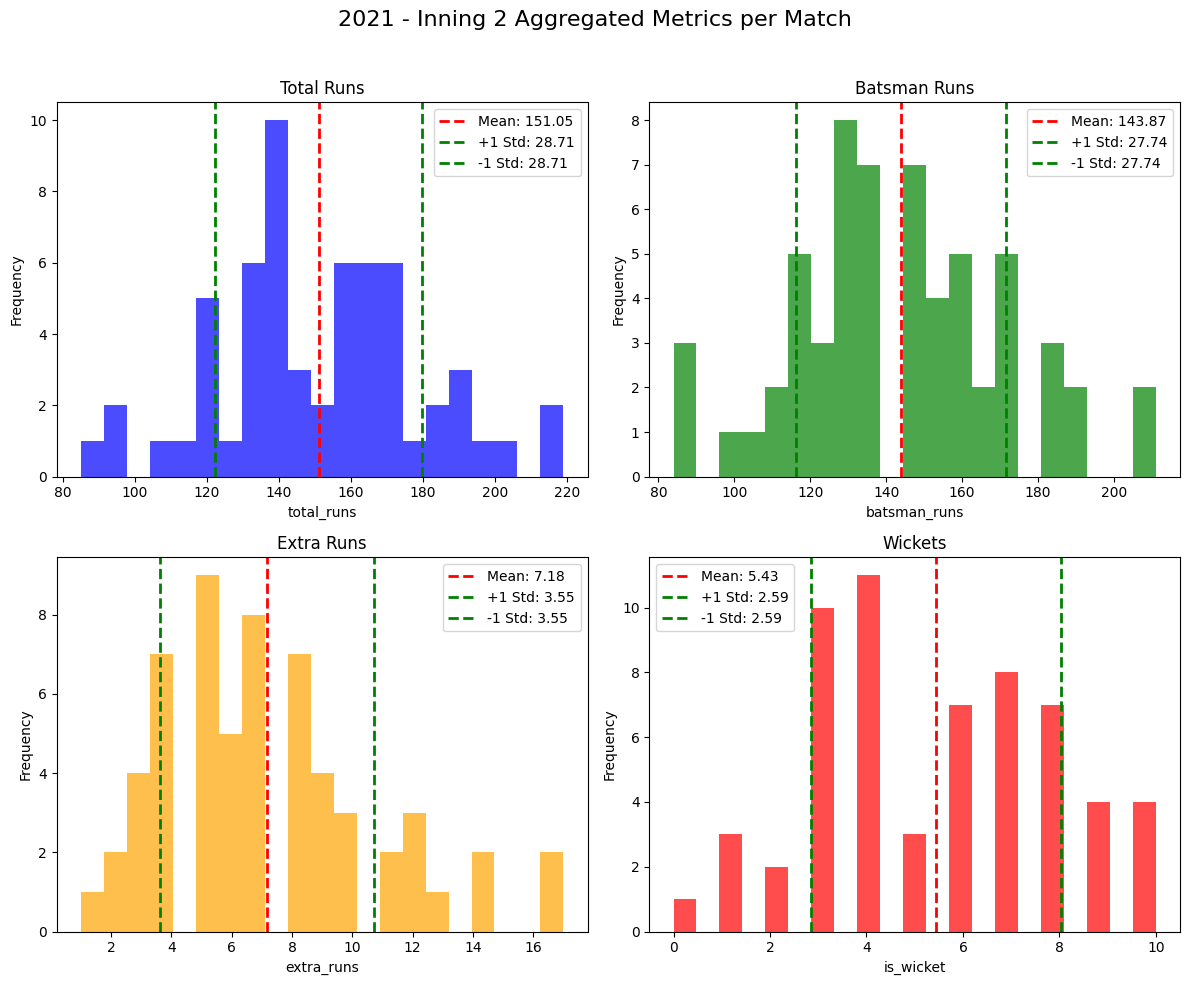

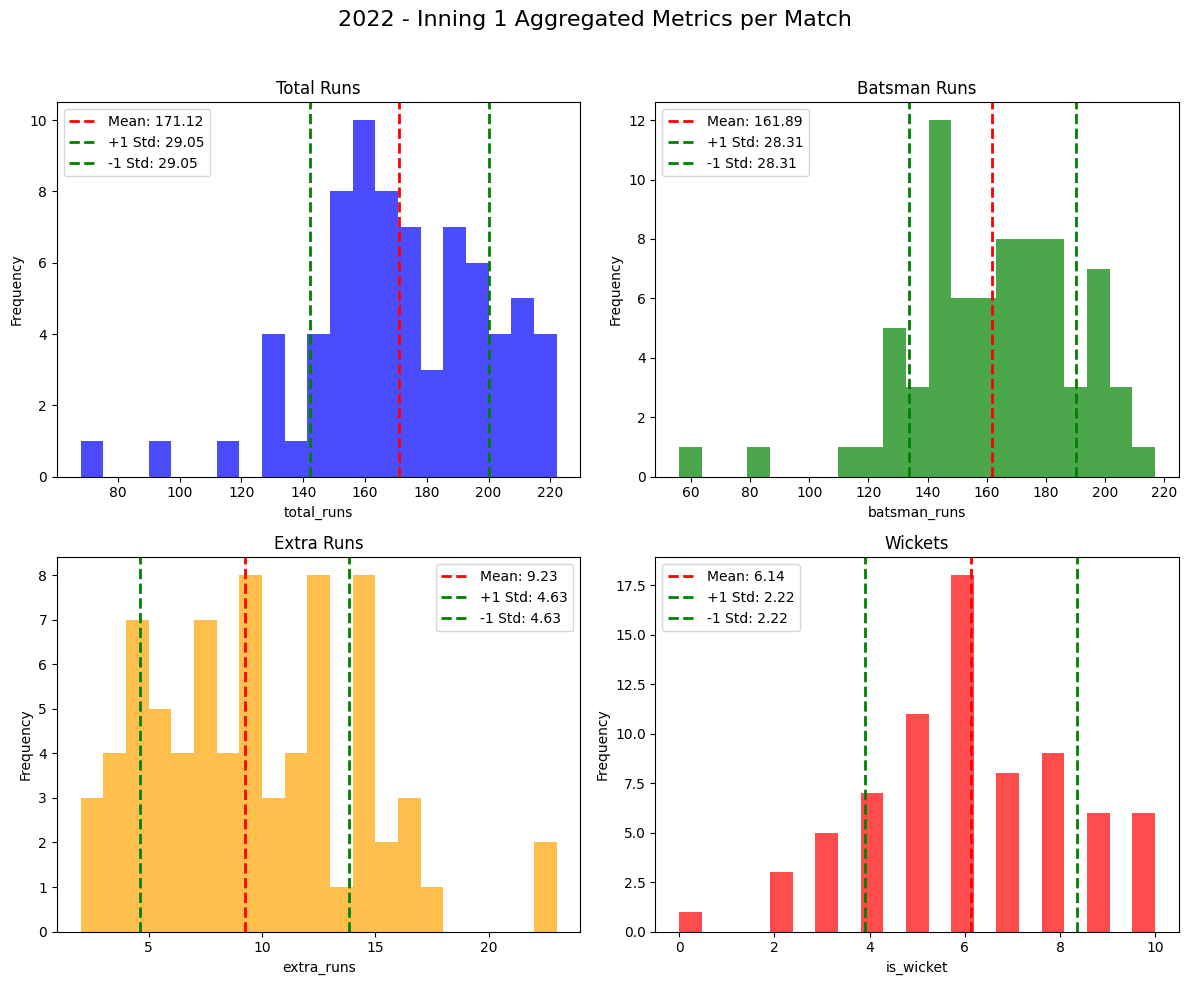

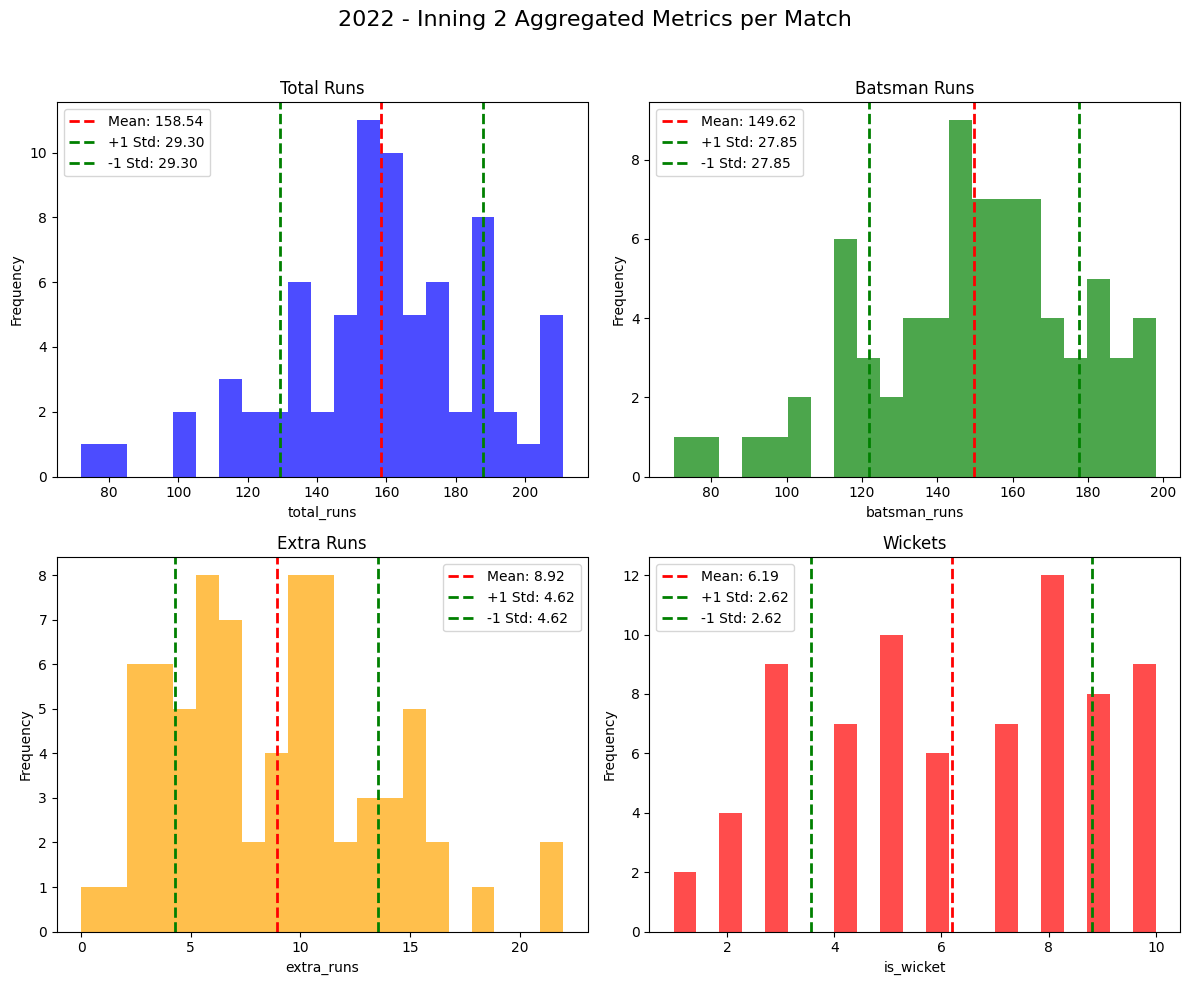

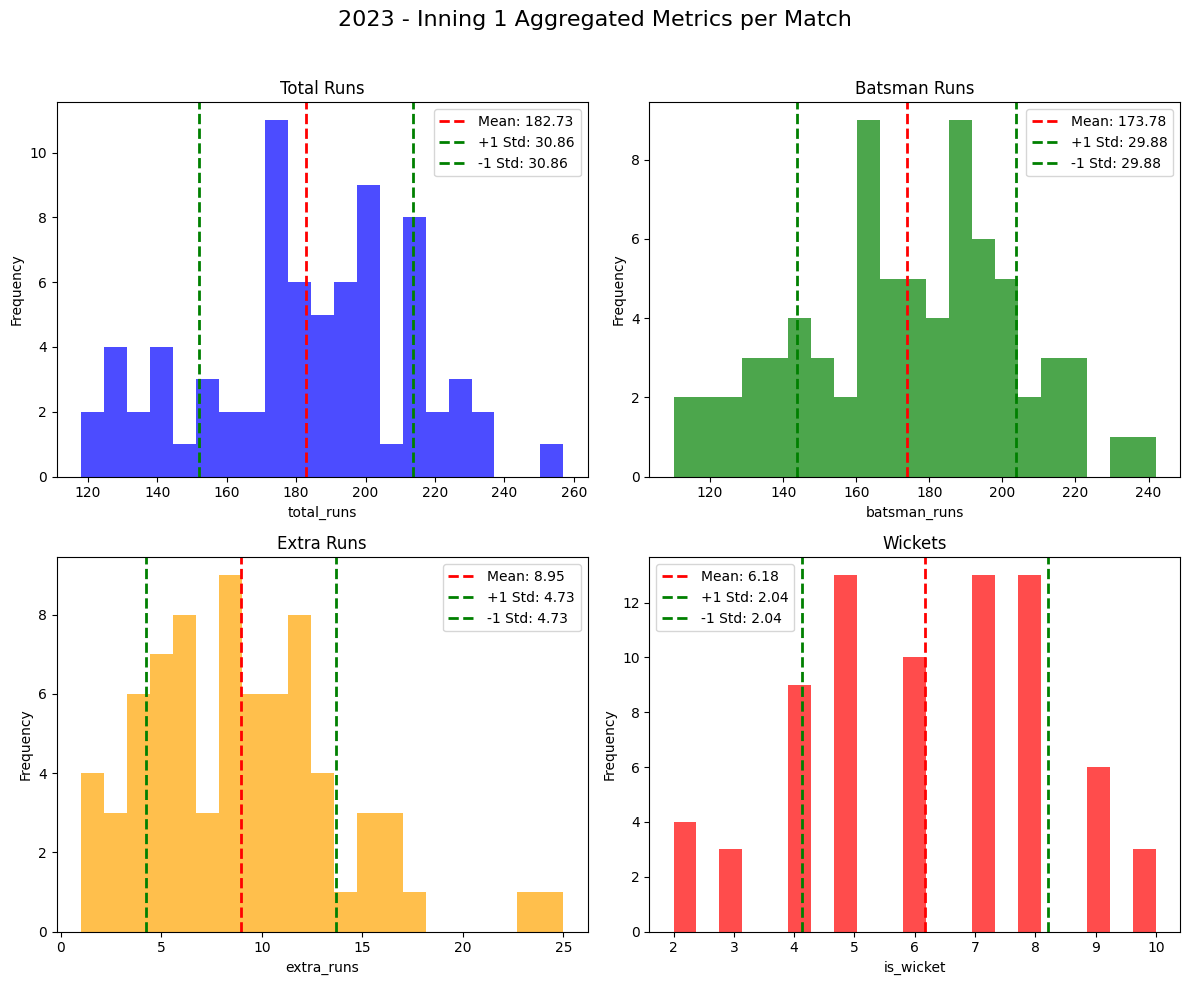

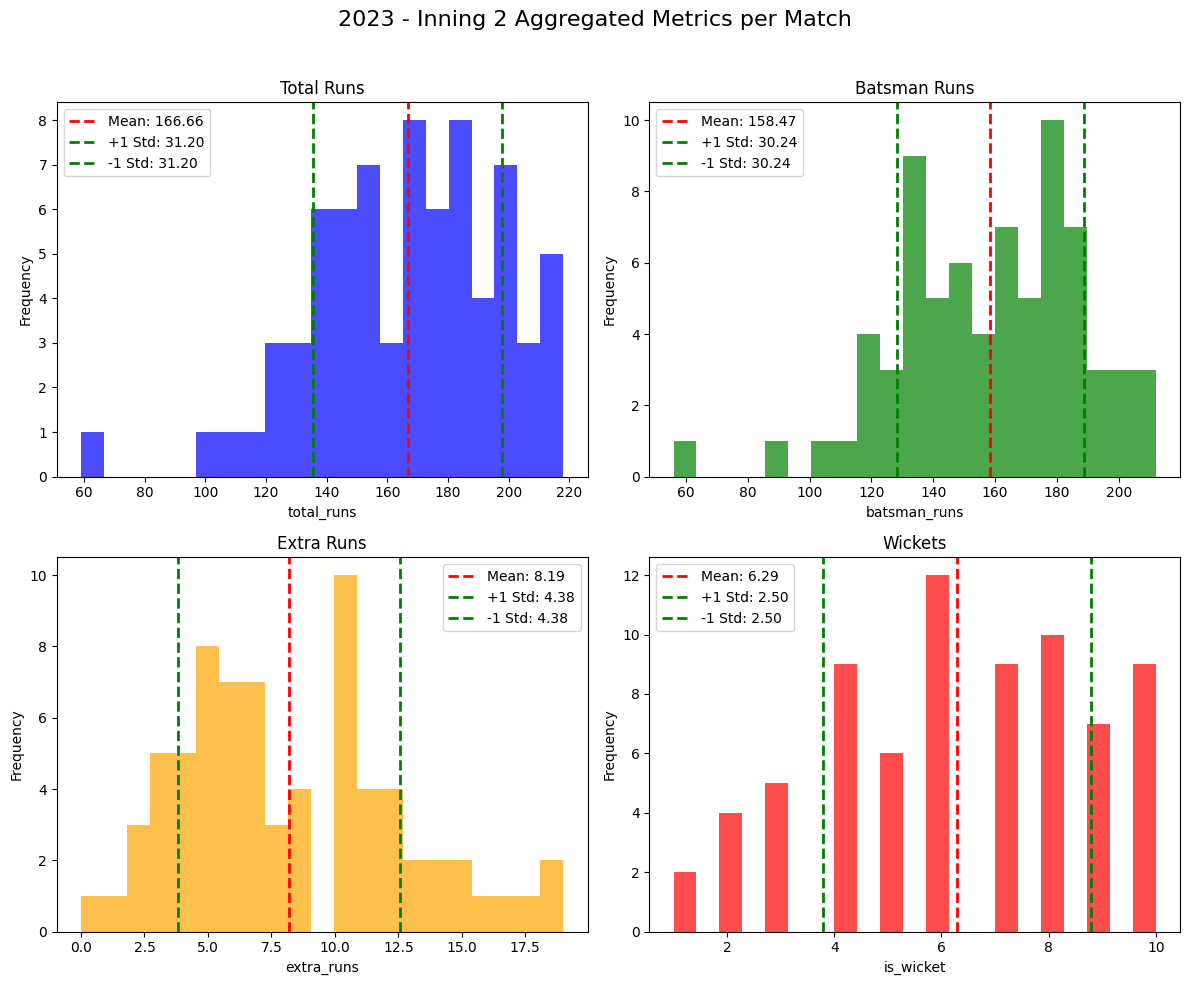

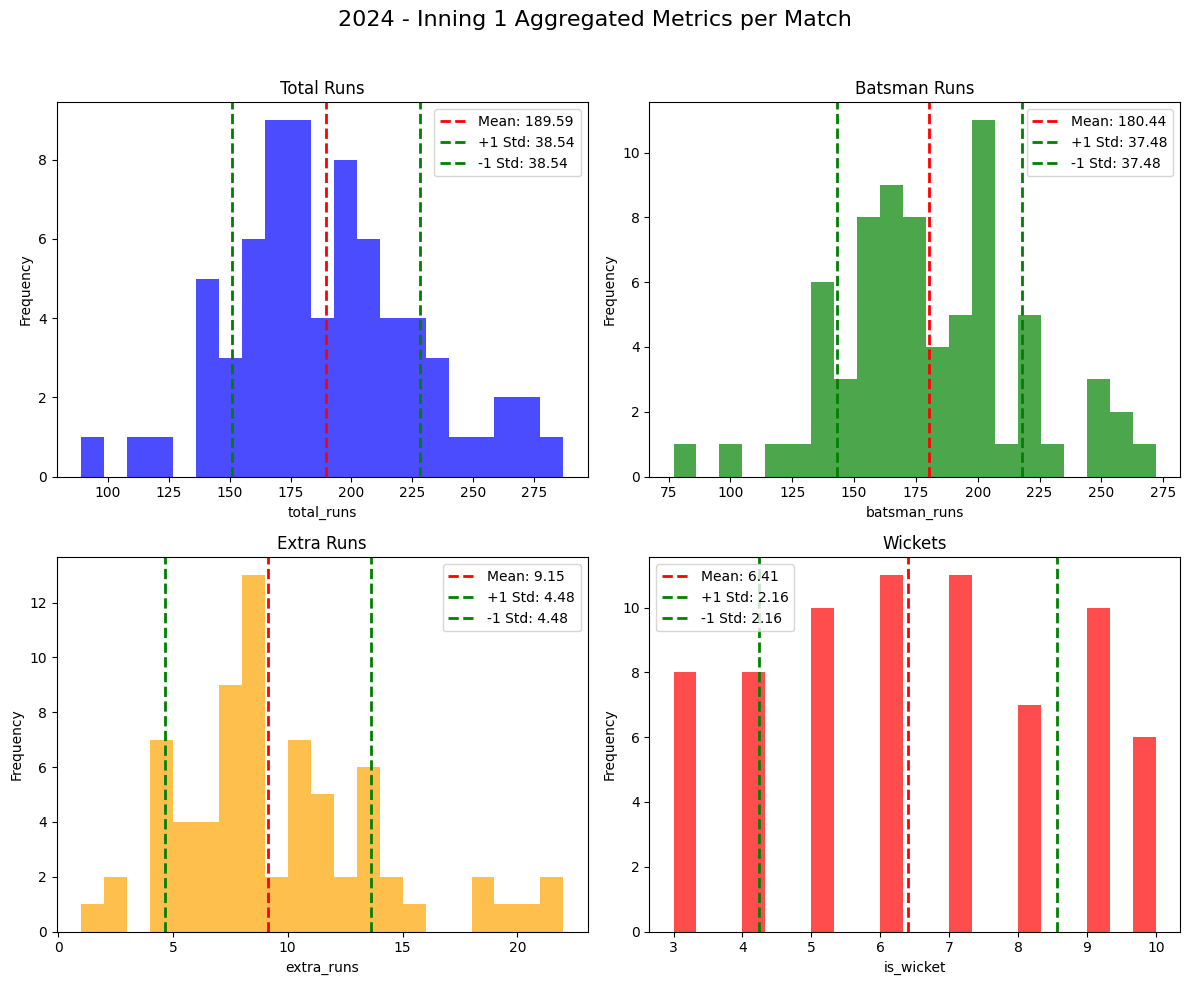

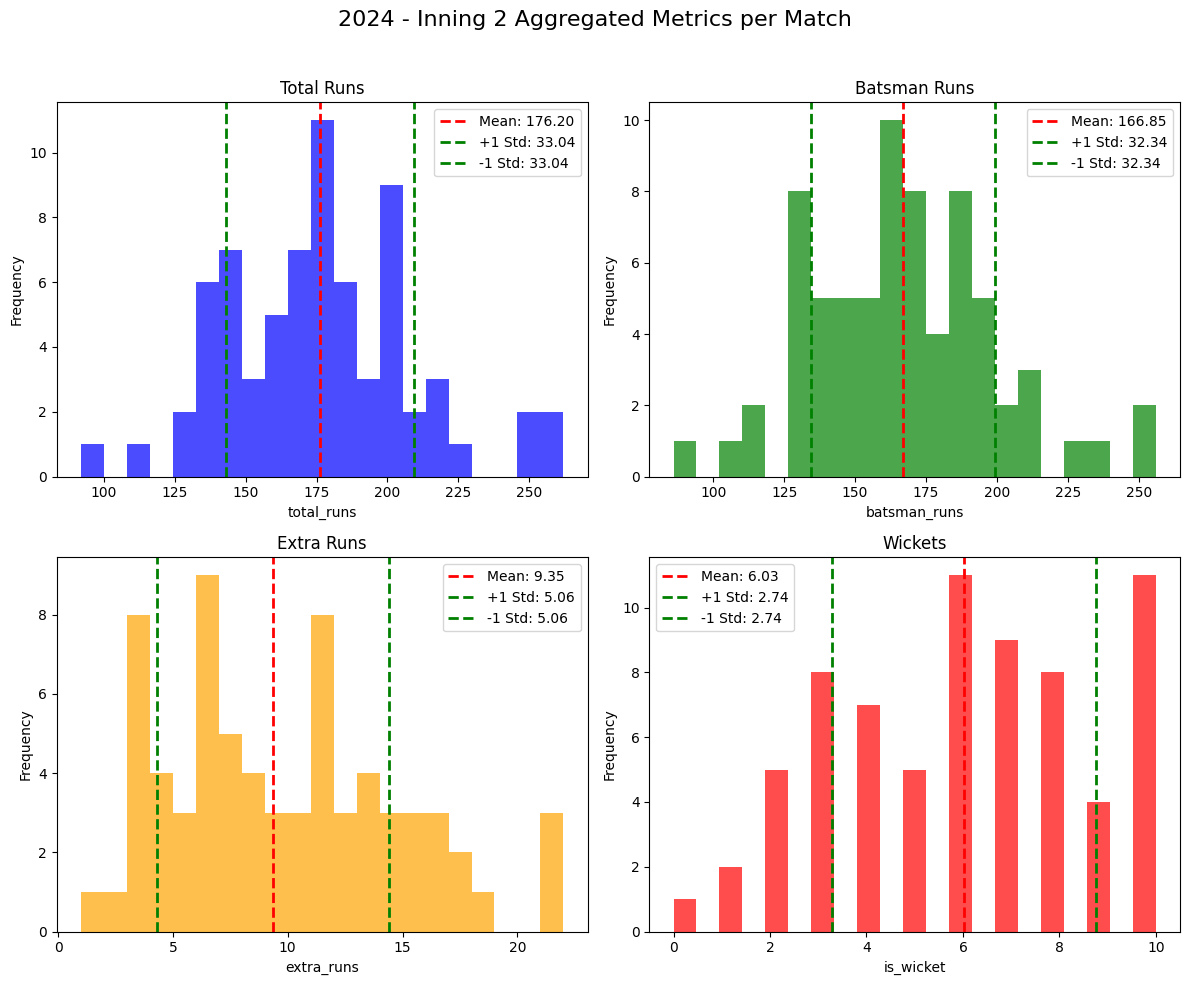

In [50]:
for season, df in ball_data_by_season.items():
    
    for inning in [1, 2]:
        # Filter for the specific inning and aggregate metrics by match_id
        aggregated_data = df[df['inning'] == inning].groupby('match_id').agg({
            'total_runs': 'sum',
            'batsman_runs': 'sum',
            'extra_runs': 'sum',
            'is_wicket': 'sum'
        }).reset_index()


        # Create a 2x2 subplot for the four metrics
        fig, axes = plt.subplots(2, 2, figsize=(12, 10))
        fig.suptitle(f'{season} - Inning {inning} Aggregated Metrics per Match', fontsize=16)

        metrics = ['total_runs', 'batsman_runs', 'extra_runs', 'is_wicket']
        titles = ['Total Runs', 'Batsman Runs', 'Extra Runs', 'Wickets']
        colors = ['blue', 'green', 'orange', 'red']

        for i, metric in enumerate(metrics):
            ax = axes[i // 2, i % 2]
            # Plot a histogram of the metric
            ax.hist(aggregated_data[metric], bins=21, color=colors[i], alpha=0.7)
            # Calculate mean and standard deviation of the metric
            mean_val = aggregated_data[metric].mean()
            std_val = aggregated_data[metric].std()

            # Add vertical lines for mean and ±1 standard deviation
            ax.axvline(mean_val, color='red', linestyle='dashed', linewidth=2,
                       label=f'Mean: {mean_val:.2f}')
            ax.axvline(mean_val + std_val, color='green', linestyle='dashed', linewidth=2,
                       label=f'+1 Std: {std_val:.2f}')
            ax.axvline(mean_val - std_val, color='green', linestyle='dashed', linewidth=2,
                       label=f'-1 Std: {std_val:.2f}')

            ax.set_title(titles[i])
            ax.set_xlabel(metric)
            ax.set_ylabel('Frequency')
            ax.legend()
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()

## Sumarising Data for Ball by ball data

Having data of a single ball does not give score for entire match or does not give insight how the team is performing.

Thus we need to summarize the data to get the score of each ball and also the score of the match at the end of each ball. We can do have to seperate the data by match_id and innings.

We have to further group the data into overs and overall match statistics.


In [ ]:
print(ball_data.columns)
print(ball_data.shape)
ball_match_ids = ball_data['match_id'].unique().tolist()
print(len(match_ids))

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')
(260920, 17)
1095


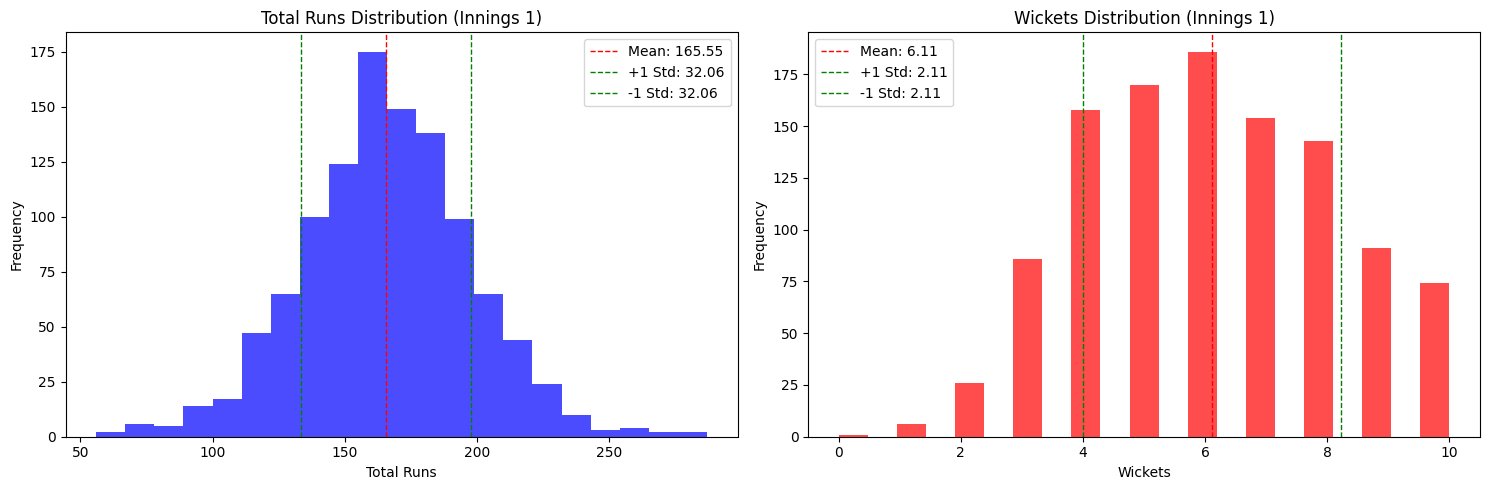

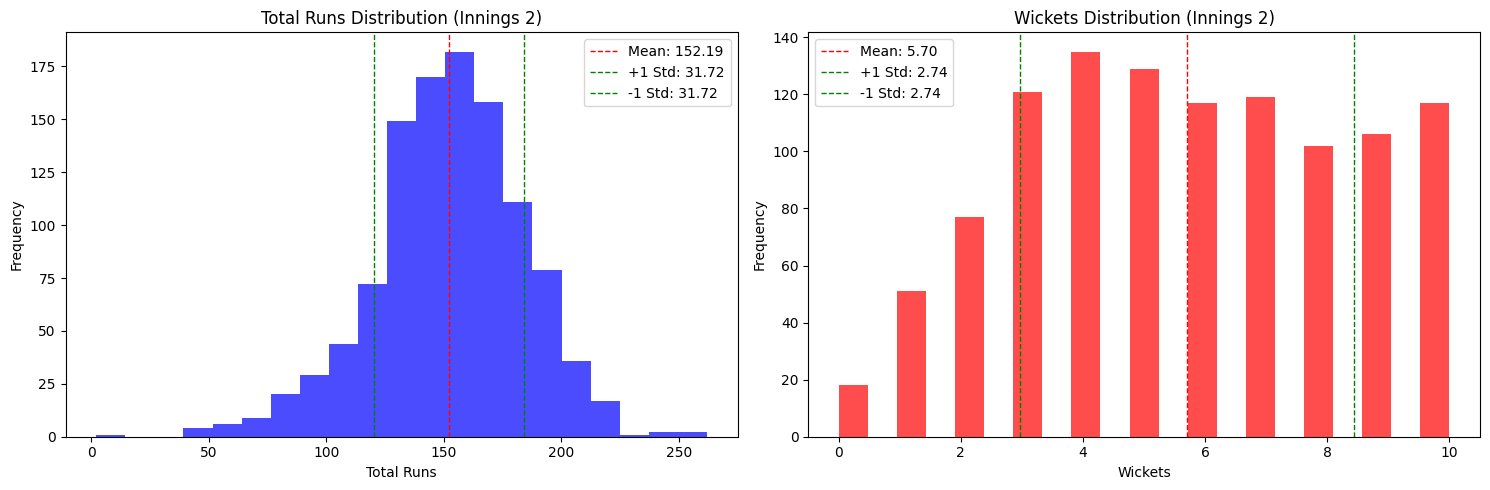

Innings 1 statistics:
Mean Total Runs: 165.54703196347032
Standard Deviation Total Runs: 32.062771612098935
Mean Wickets: 6.114155251141552
Standard Deviation Wickets: 2.1147887455719787

Innings 2 statistics:
Mean Total Runs: 152.19413919413918
Standard Deviation Total Runs: 31.72086728267123
Mean Wickets: 5.7032967032967035
Standard Deviation Wickets: 2.736498081928755


In [34]:
# Grouping data by match_id and inning
aggregated_data = data.groupby(['match_id', 'inning']).agg({
    'total_runs': 'sum',
    'batsman_runs': 'sum',
    'extra_runs': 'sum',
    'is_wicket': 'sum'
}).reset_index()

# Filter data for innings 1 and innings 2
inning1_data = aggregated_data[aggregated_data['inning'] == 1]
inning2_data = aggregated_data[aggregated_data['inning'] == 2]

# Plotting the data for innings 1
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Total runs histogram for innings 1
axes[0].hist(inning1_data['total_runs'], bins=21, color='blue', alpha=0.7)
mean_total1 = inning1_data['total_runs'].mean()
std_total1 = inning1_data['total_runs'].std()
axes[0].axvline(mean_total1, color='red', linestyle='dashed', linewidth=1, label=f"Mean: {mean_total1:.2f}")
axes[0].axvline(mean_total1 + std_total1, color='green', linestyle='dashed', linewidth=1, label=f"+1 Std: {std_total1:.2f}")
axes[0].axvline(mean_total1 - std_total1, color='green', linestyle='dashed', linewidth=1, label=f"-1 Std: {std_total1:.2f}")
axes[0].set_title('Total Runs Distribution (Innings 1)')
axes[0].set_xlabel('Total Runs')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Wickets histogram for innings 1
axes[1].hist(inning1_data['is_wicket'], bins=21, color='red', alpha=0.7)
mean_wick1 = inning1_data['is_wicket'].mean()
std_wick1 = inning1_data['is_wicket'].std()
axes[1].axvline(mean_wick1, color='red', linestyle='dashed', linewidth=1, label=f"Mean: {mean_wick1:.2f}")
axes[1].axvline(mean_wick1 + std_wick1, color='green', linestyle='dashed', linewidth=1, label=f"+1 Std: {std_wick1:.2f}")
axes[1].axvline(mean_wick1 - std_wick1, color='green', linestyle='dashed', linewidth=1, label=f"-1 Std: {std_wick1:.2f}")
axes[1].set_title('Wickets Distribution (Innings 1)')
axes[1].set_xlabel('Wickets')
axes[1].set_ylabel('Frequency')
axes[1].legend()

plt.tight_layout()
plt.show()

# Plotting the data for innings 2
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Total runs histogram for innings 2
axes[0].hist(inning2_data['total_runs'], bins=21, color='blue', alpha=0.7)
mean_total2 = inning2_data['total_runs'].mean()
std_total2 = inning2_data['total_runs'].std()
axes[0].axvline(mean_total2, color='red', linestyle='dashed', linewidth=1, label=f"Mean: {mean_total2:.2f}")
axes[0].axvline(mean_total2 + std_total2, color='green', linestyle='dashed', linewidth=1, label=f"+1 Std: {std_total2:.2f}")
axes[0].axvline(mean_total2 - std_total2, color='green', linestyle='dashed', linewidth=1, label=f"-1 Std: {std_total2:.2f}")
axes[0].set_title('Total Runs Distribution (Innings 2)')
axes[0].set_xlabel('Total Runs')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Wickets histogram for innings 2
axes[1].hist(inning2_data['is_wicket'], bins=21, color='red', alpha=0.7)
mean_wick2 = inning2_data['is_wicket'].mean()
std_wick2 = inning2_data['is_wicket'].std()
axes[1].axvline(mean_wick2, color='red', linestyle='dashed', linewidth=1, label=f"Mean: {mean_wick2:.2f}")
axes[1].axvline(mean_wick2 + std_wick2, color='green', linestyle='dashed', linewidth=1, label=f"+1 Std: {std_wick2:.2f}")
axes[1].axvline(mean_wick2 - std_wick2, color='green', linestyle='dashed', linewidth=1, label=f"-1 Std: {std_wick2:.2f}")
axes[1].set_title('Wickets Distribution (Innings 2)')
axes[1].set_xlabel('Wickets')
axes[1].set_ylabel('Frequency')
axes[1].legend()

plt.tight_layout()
plt.show()

# Calculate and print the mean and standard deviation for innings 1
print("Innings 1 statistics:")
print("Mean Total Runs:", mean_total1)
print("Standard Deviation Total Runs:", std_total1)
print("Mean Wickets:", mean_wick1)
print("Standard Deviation Wickets:", std_wick1)
print()

# Calculate and print the mean and standard deviation for innings 2
print("Innings 2 statistics:")
print("Mean Total Runs:", mean_total2)
print("Standard Deviation Total Runs:", std_total2)
print("Mean Wickets:", mean_wick2)
print("Standard Deviation Wickets:", std_wick2)


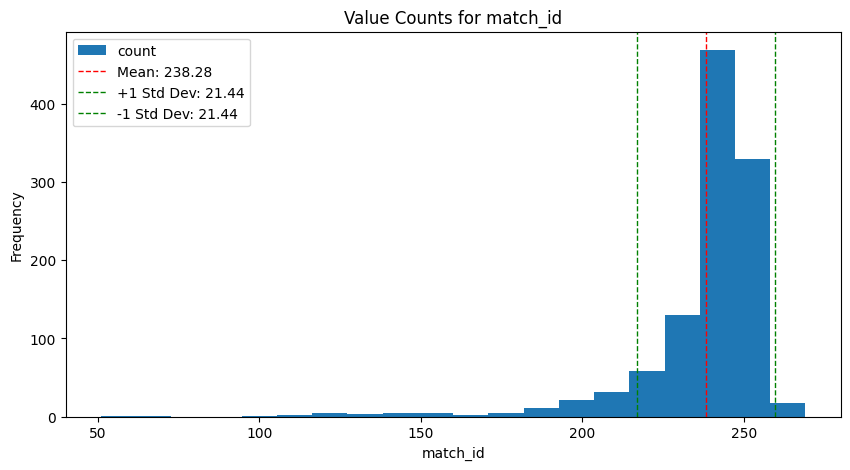

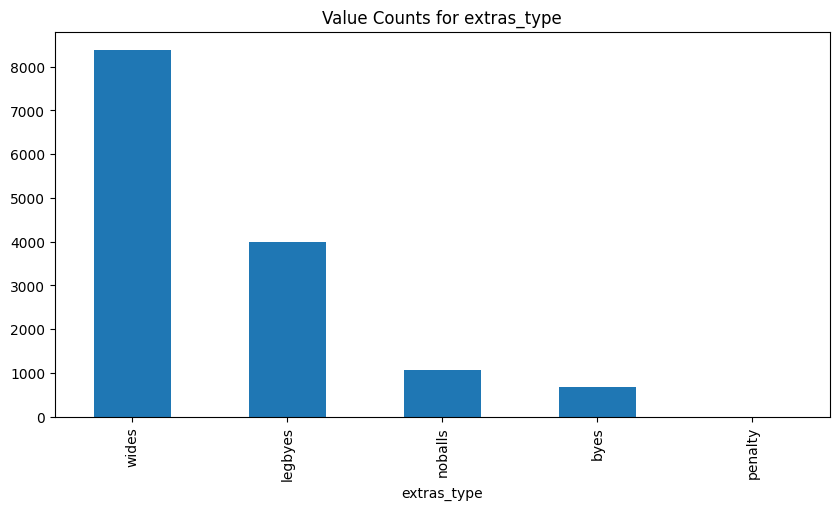

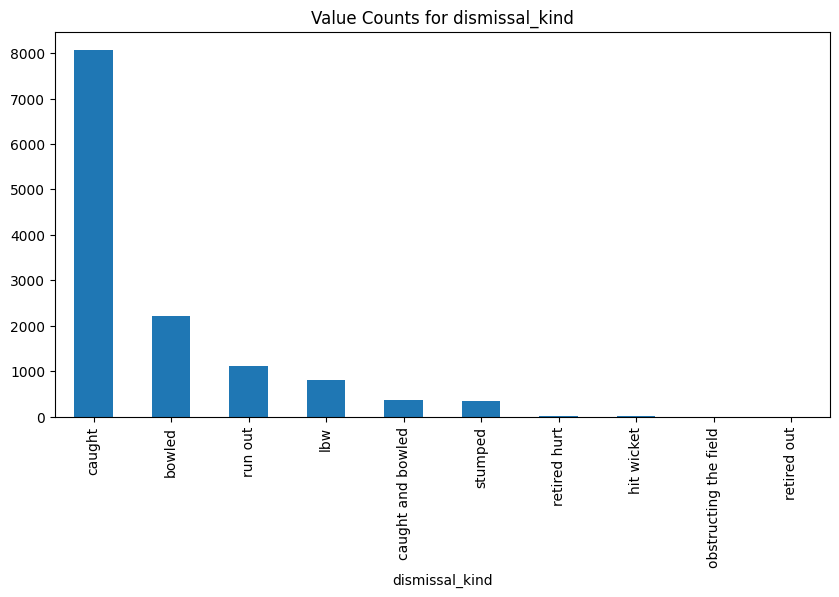

In [21]:

## Per Ball Analysis
# ------------------

value_counts = {col: data[col].value_counts() for col in data.columns}
value_counts
for col, counts in value_counts.items():
    if col in ['match_id']:
        counts.plot(kind='hist', bins=20, figsize=(10, 5), title=f"Value Counts for {col}")
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.axvline(counts.mean(), color='red', linestyle='dashed', linewidth=1, label=f'Mean: {counts.mean():.2f}')
        std_dev = counts.var()**0.5
        plt.axvline(counts.mean() + std_dev, color='green', linestyle='dashed', linewidth=1, label=f'+1 Std Dev: {std_dev:.2f}')
        plt.axvline(counts.mean() - std_dev, color='green', linestyle='dashed', linewidth=1, label=f'-1 Std Dev: {std_dev:.2f}')
        plt.legend()
    elif col in ['extras_type', 'dismissal_kind']:
        counts.plot(kind='bar', figsize=(10, 5), title=f"Value Counts for {col}")
    plt.show()